<a href="https://colab.research.google.com/github/Anjali-Muskan/EDA-DA1/blob/main/21bds0375_eda_th_da1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_csv('superbowl_commercials.csv')


In [ ]:
print("Dataset Dimensions:", df.shape)
print("Data Types:\n", df.dtypes)


Dataset Dimensions: (249, 16)
Data Types:
 Year                       int64
Brand                     object
Superbowl Ads Link        object
Youtube Link              object
Funny                       bool
Shows Product Quickly       bool
Patriotic                   bool
Celebrity                   bool
Danger                      bool
Animals                     bool
Uses Sex                    bool
Length                     int64
Estimated Cost           float64
Youtube Views            float64
Youtube Likes            float64
TV Viewers               float64
dtype: object


In [ ]:
print("Dataset Dimensions:", df.shape)
print("Data Types:\n", df.dtypes)


Dataset Dimensions: (249, 16)
Data Types:
 Year                       int64
Brand                     object
Superbowl Ads Link        object
Youtube Link              object
Funny                       bool
Shows Product Quickly       bool
Patriotic                   bool
Celebrity                   bool
Danger                      bool
Animals                     bool
Uses Sex                    bool
Length                     int64
Estimated Cost           float64
Youtube Views            float64
Youtube Likes            float64
TV Viewers               float64
dtype: object


In [ ]:
print("Summary Statistics:\n", df.describe())


Summary Statistics:
               Year      Length  Estimated Cost  Youtube Views  Youtube Likes  \
count   249.000000  249.000000      249.000000   2.370000e+02     231.000000   
mean   2010.469880   44.457831        5.156888   1.569672e+06    5086.592713   
std       6.002024   21.331845        4.075974   1.229921e+07   28387.597549   
min    2000.000000   10.000000        0.980000   5.000000e+00       0.000000   
25%    2006.000000   30.000000        2.400000   7.256000e+03      20.500000   
50%    2010.000000   30.000000        3.150000   4.730900e+04     146.000000   
75%    2015.000000   60.000000        5.900000   1.813620e+05     704.500000   
max    2021.000000  180.000000       31.730000   1.814238e+08  295000.000000   

       TV Viewers  
count  249.000000  
mean   100.475341  
std     12.819811  
min     84.340000  
25%     90.750000  
50%     98.730000  
75%    111.010000  
max    232.000000  


In [ ]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Year                      0
Brand                     0
Superbowl Ads Link        0
Youtube Link              9
Funny                     0
Shows Product Quickly     0
Patriotic                 0
Celebrity                 0
Danger                    0
Animals                   0
Uses Sex                  0
Length                    0
Estimated Cost            0
Youtube Views            12
Youtube Likes            18
TV Viewers                0
dtype: int64


In [ ]:
# Fill numeric columns with the mean
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()))

# Fill string (or object) columns with the most frequent value (mode)
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))



In [ ]:
df.drop_duplicates(inplace=True)


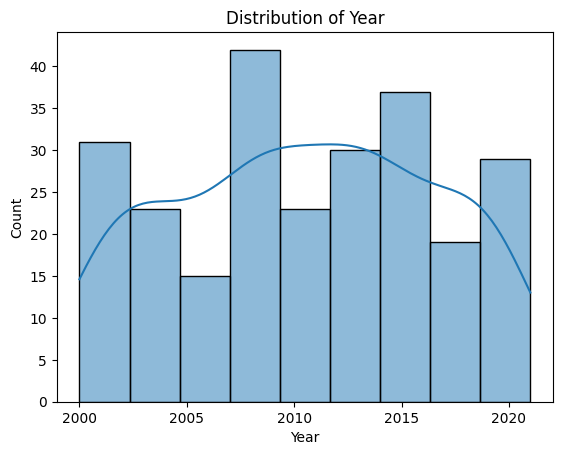

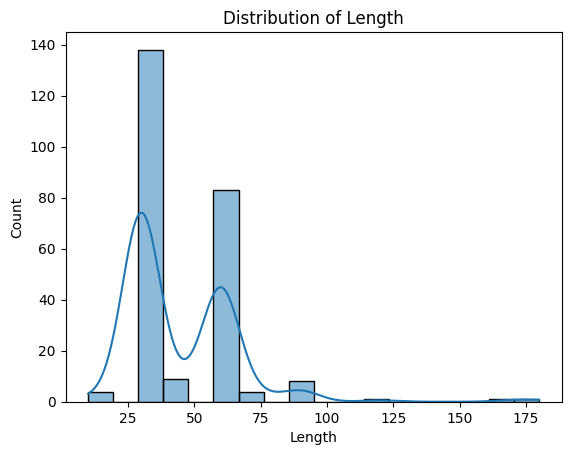

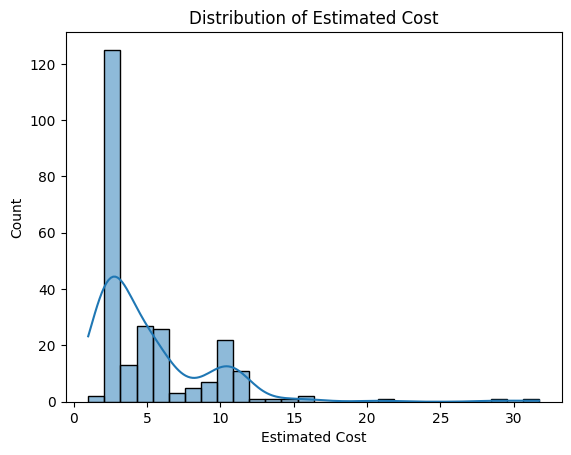

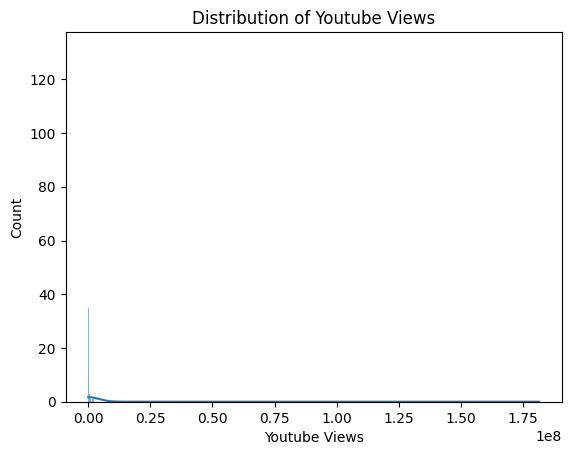

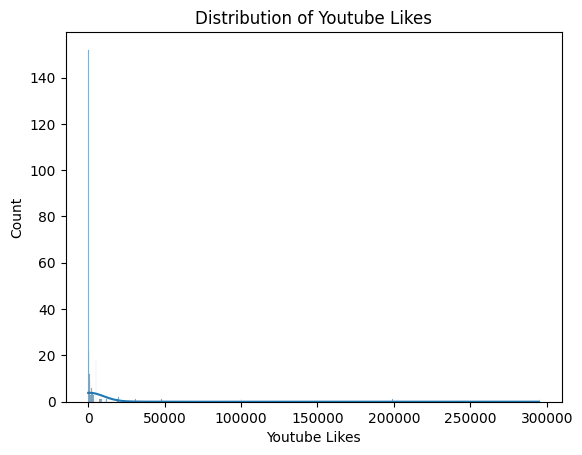

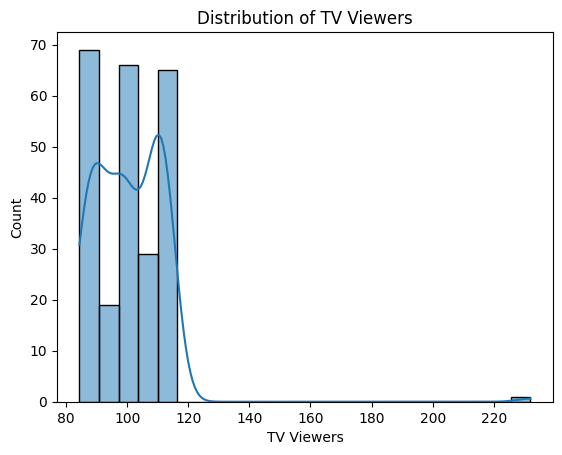

In [ ]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


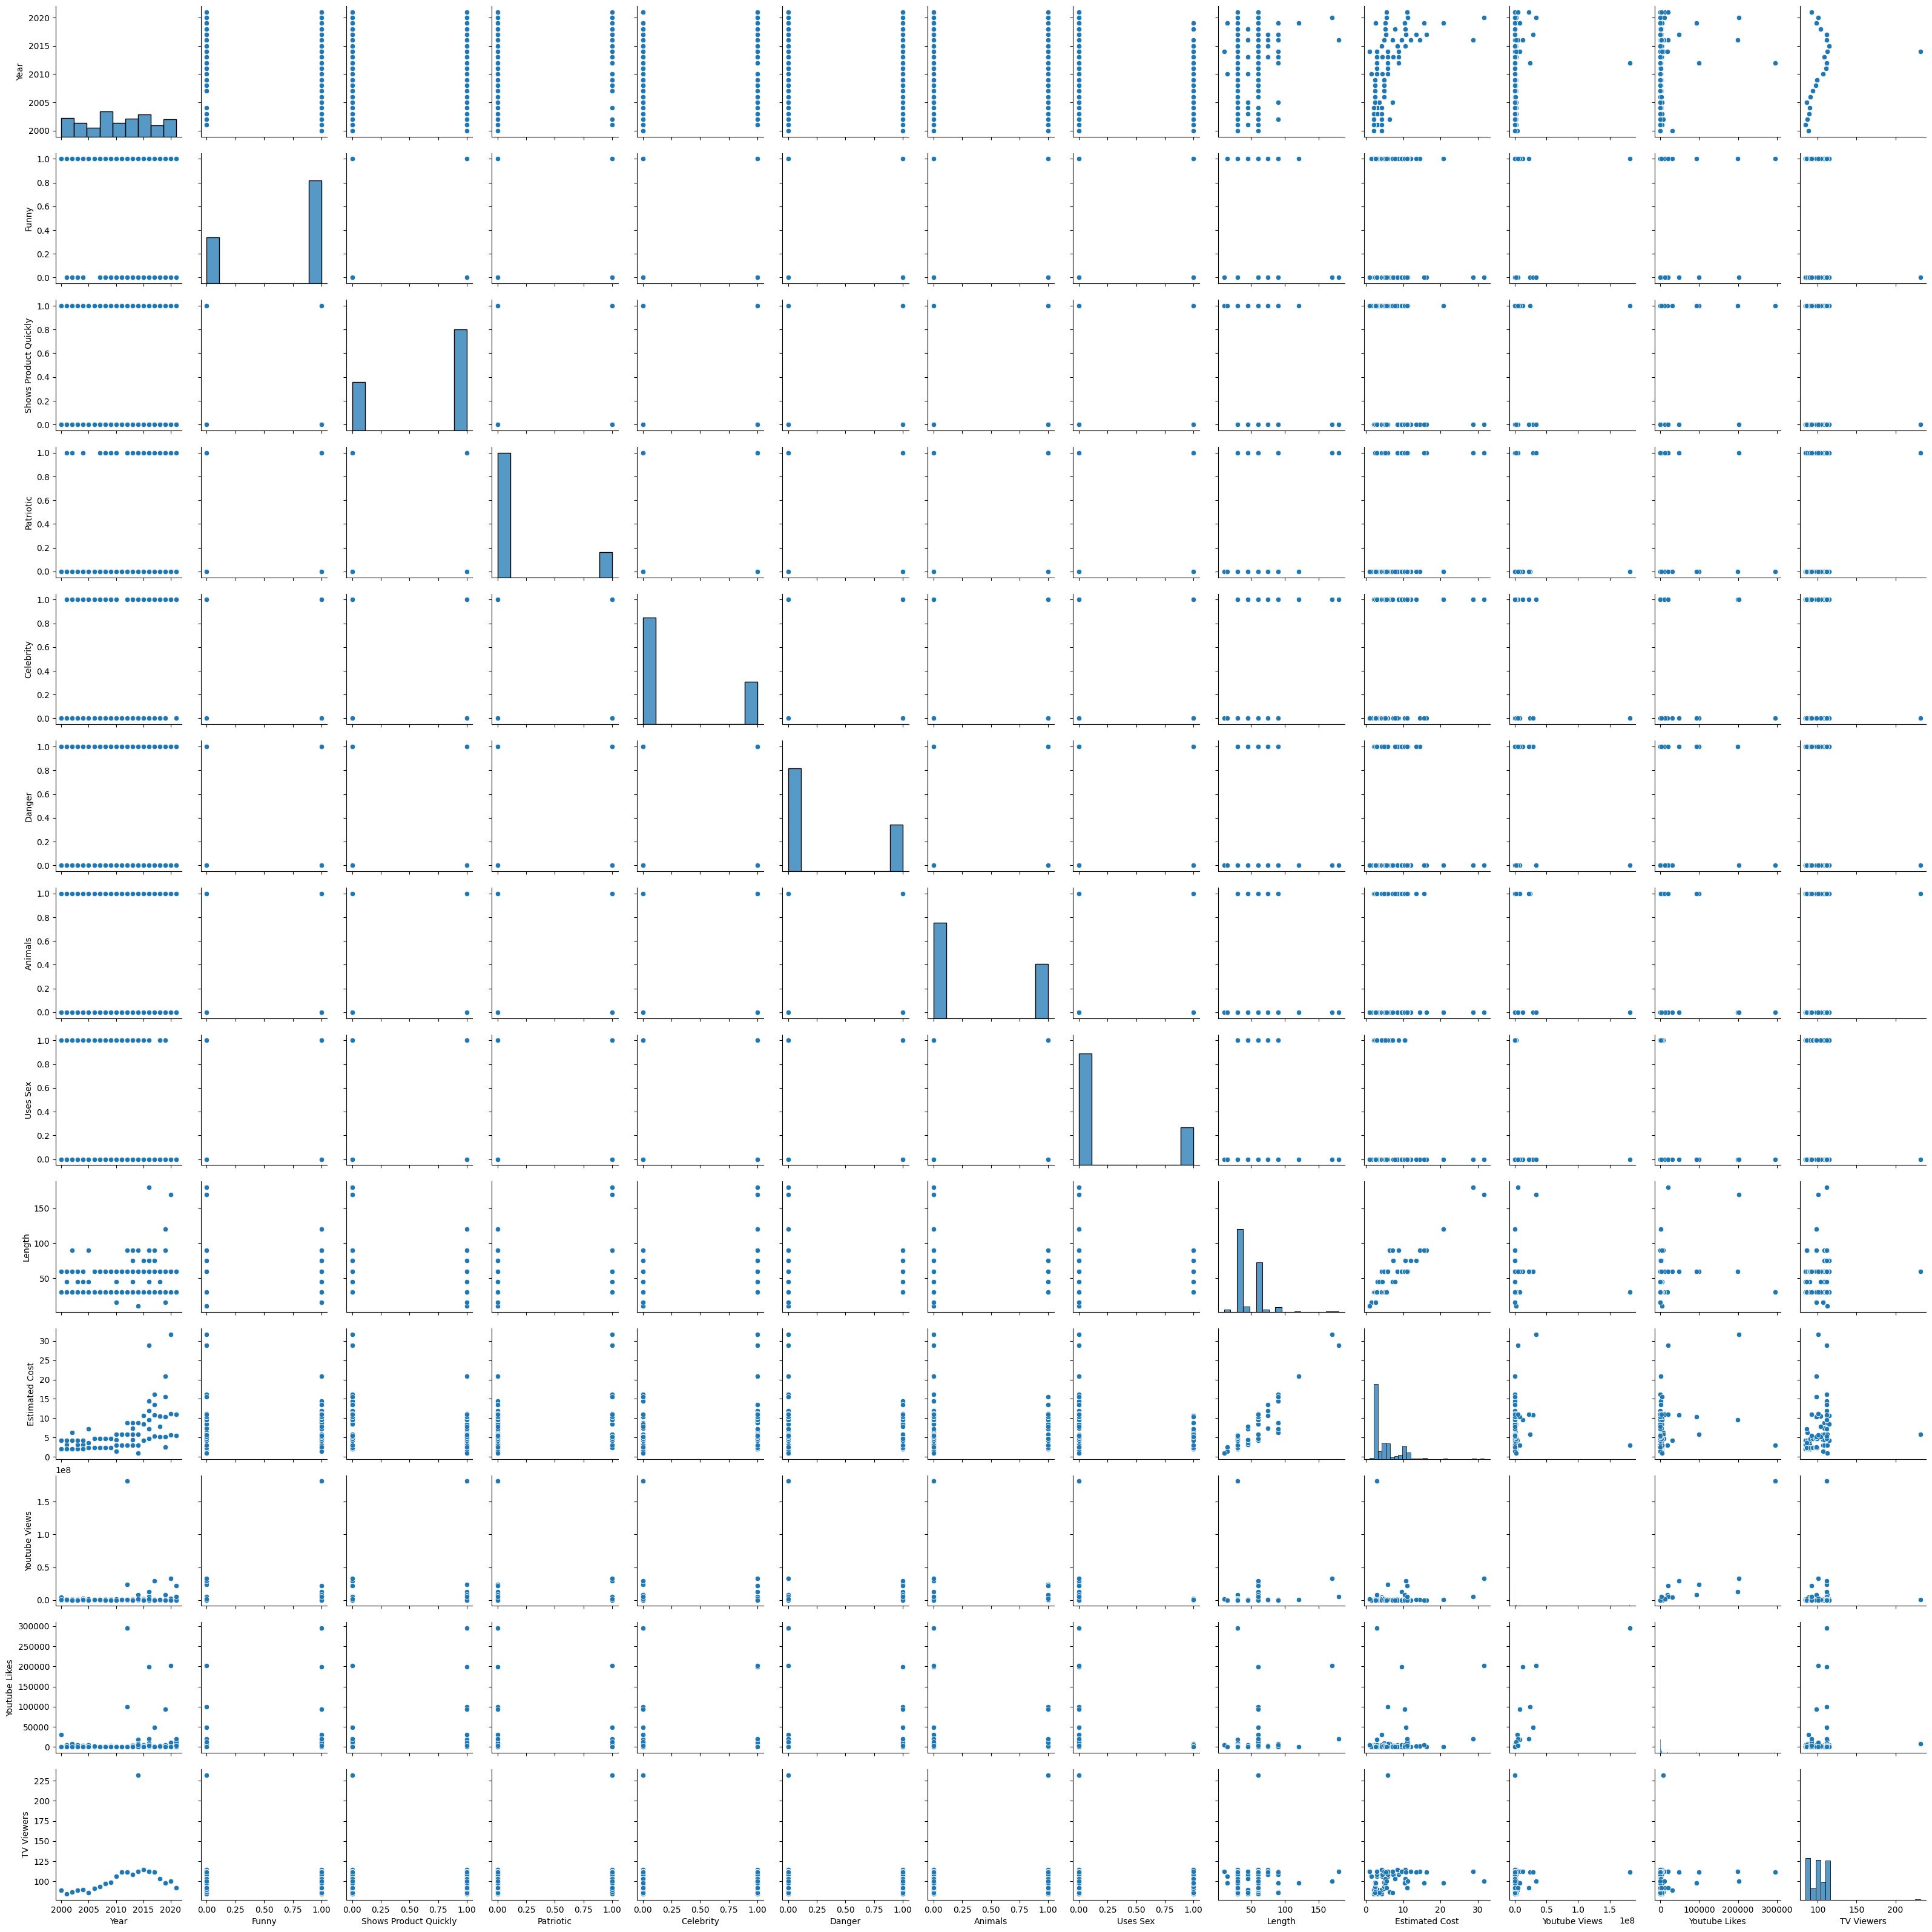

In [ ]:
sns.pairplot(df)
plt.show()


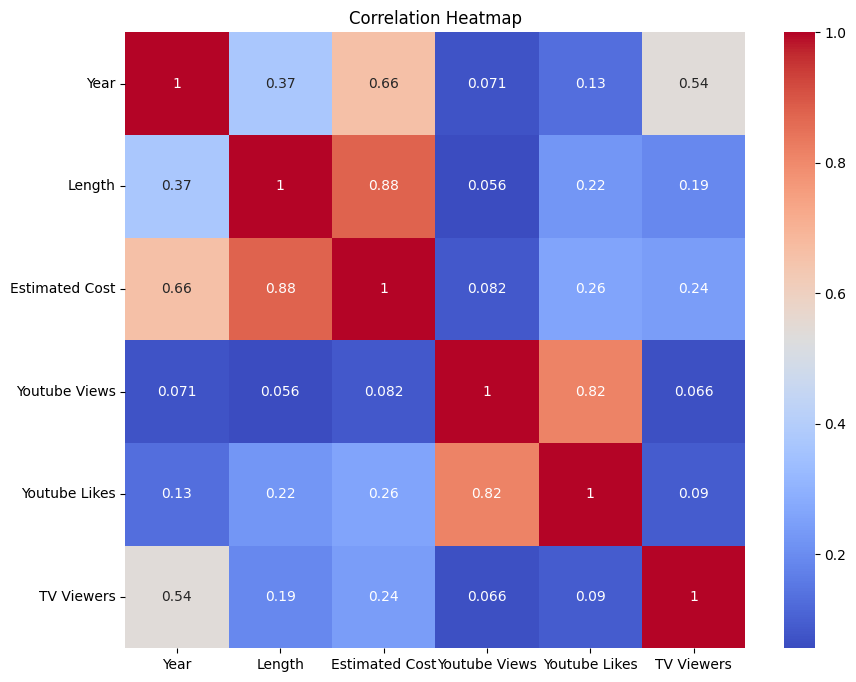

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




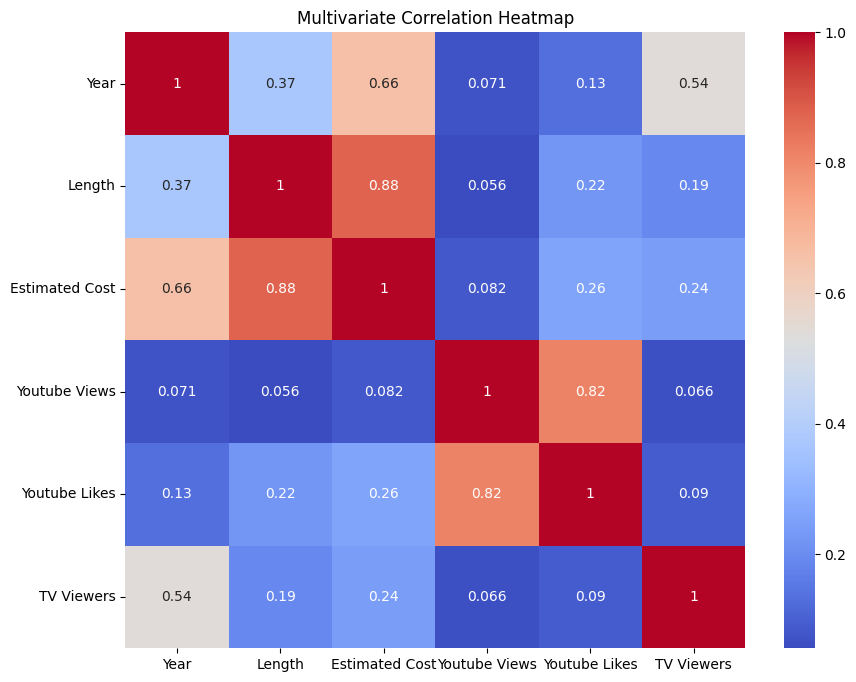

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Multivariate Correlation Heatmap")
plt.show()



In [ ]:
print(df.columns)


Index(['Year', 'Brand', 'Superbowl Ads Link', 'Youtube Link', 'Funny',
       'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals',
       'Uses Sex', 'Length', 'Estimated Cost', 'Youtube Views',
       'Youtube Likes', 'TV Viewers'],
      dtype='object')


In [ ]:
X = df.drop('Youtube Views', axis=1)  # Features
y = df['Youtube Views']  # Target variable



In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill or drop missing values as needed
# Example: Dropping rows with any missing values
df_cleaned = df.dropna()
# Alternatively, you can fill missing values
# df['column_name'].fillna(value, inplace=True)



Missing values in each column:
Year                     0
Brand                    0
Superbowl Ads Link       0
Youtube Link             0
Funny                    0
Shows Product Quickly    0
Patriotic                0
Celebrity                0
Danger                   0
Animals                  0
Uses Sex                 0
Length                   0
Estimated Cost           0
Youtube Views            0
Youtube Likes            0
TV Viewers               0
dtype: int64


In [ ]:
print("Shape of cleaned DataFrame:", df_cleaned.shape)


Shape of cleaned DataFrame: (249, 16)


In [ ]:
# Define features and target variable
X = df_cleaned.drop('Youtube Views', axis=1)  # Adjust this if needed
y = df_cleaned['Youtube Views']

# Convert categorical variables using one-hot encoding if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 19188309841168.754
R-squared: -8.332328246127652


In [ ]:

df_cleaned.to_csv('cleaned_data.csv', index=False)

import joblib
joblib.dump(model, 'linear_model.pkl')


['linear_model.pkl']

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the file in Colab
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Inspect the dataset
data.info()
data.head()


Saving superbowl_commercials.csv to superbowl_commercials (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Brand                  249 non-null    object 
 2   Superbowl Ads Link     249 non-null    object 
 3   Youtube Link           240 non-null    object 
 4   Funny                  249 non-null    bool   
 5   Shows Product Quickly  249 non-null    bool   
 6   Patriotic              249 non-null    bool   
 7   Celebrity              249 non-null    bool   
 8   Danger                 249 non-null    bool   
 9   Animals                249 non-null    bool   
 10  Uses Sex               249 non-null    bool   
 11  Length                 249 non-null    int64  
 12  Estimated Cost         249 non-null    float64
 13  Youtube Views          237 non-null    float

Year      Brand                                 Superbowl Ads Link  \
0  2000    E-Trade  https://superbowl-ads.com/2000-etrade-monkey-d...   
1  2000    E-Trade  https://superbowl-ads.com/2000-etrade-money-ou...   
2  2000  Budweiser  https://superbowl-ads.com/2000-budweiser-whaas...   
3  2000  Bud Light  https://superbowl-ads.com/2000-bud-light-hold-...   
4  2000  Budweiser  https://superbowl-ads.com/2000-budweiser-talki...   

                                  Youtube Link  Funny  Shows Product Quickly  \
0  https://www.youtube.com/watch?v=Muyq2kMDFoA   True                   True   
1  https://www.youtube.com/watch?v=oftjwYmlfoA   True                   True   
2  https://www.youtube.com/watch?v=loimTUjV92Q   True                   True   
3  https://www.youtube.com/watch?v=M3IV93HwSkc   True                   True   
4  https://www.youtube.com/watch?v=dK1tlG778J8   True                  False   

   Patriotic  Celebrity  Danger  Animals  Uses Sex  Length  Estimated Cost  \
0      False      False   False     True     False      30             2.1   
1      False      False    True    False     False      30             2.1   
2      False      False   False    False     False      30             2.1   
3      False      False    True    False     False      30             2.1   
4      False      False   False     True     False      30             2.1   

   Youtube Views  Youtube Likes  TV Viewers  
0        13615.0           84.0       88.47  
1        72772.0          146.0       88.47  
2         5399.0           11.0       88.47  
3         6699.0            8.0       88.47  
4        18972.0            6.0       88.47

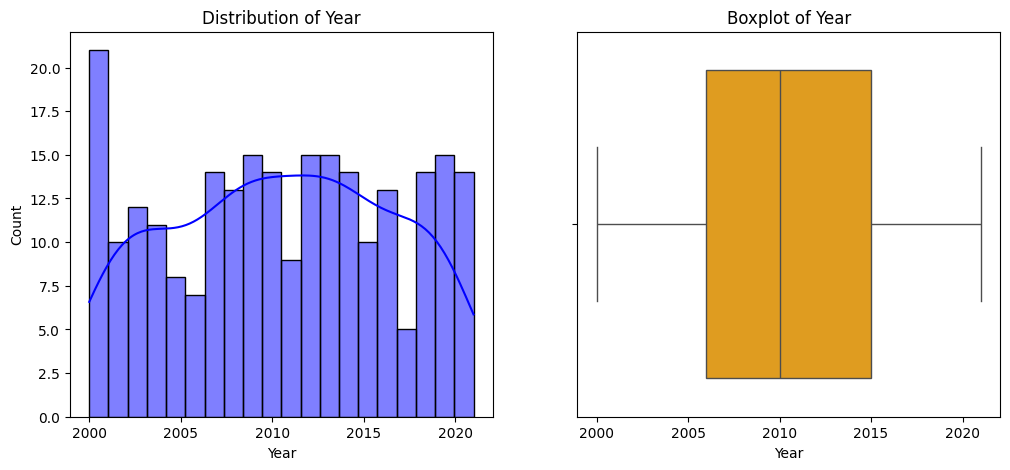

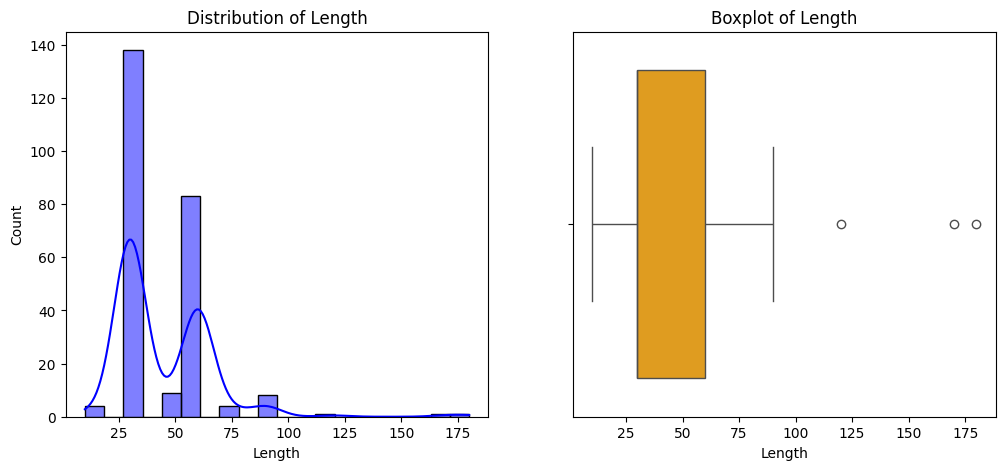

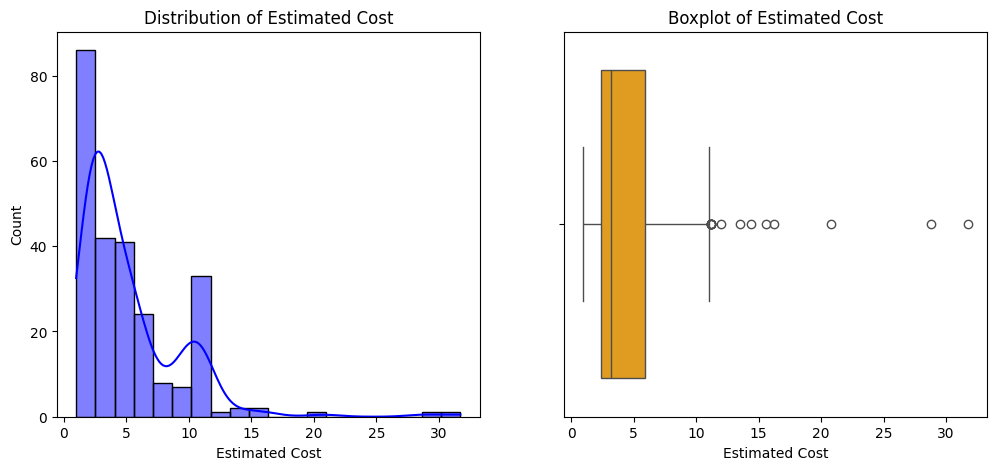

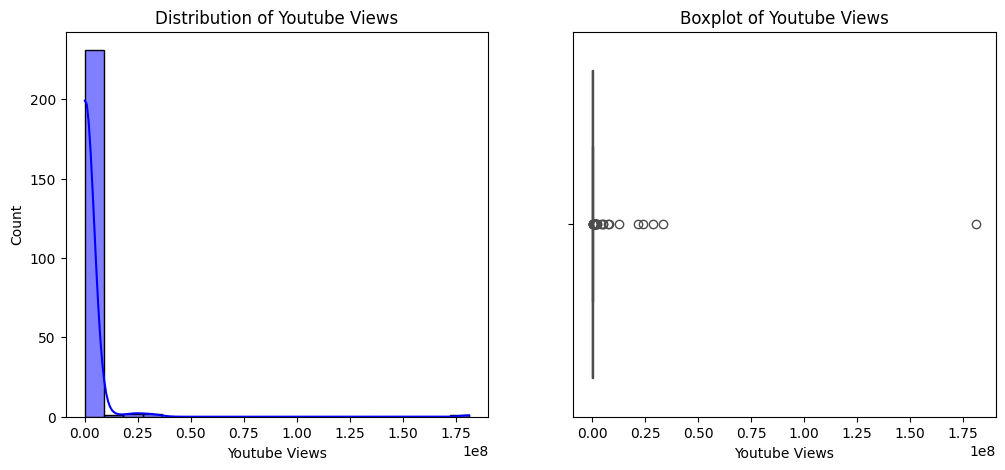

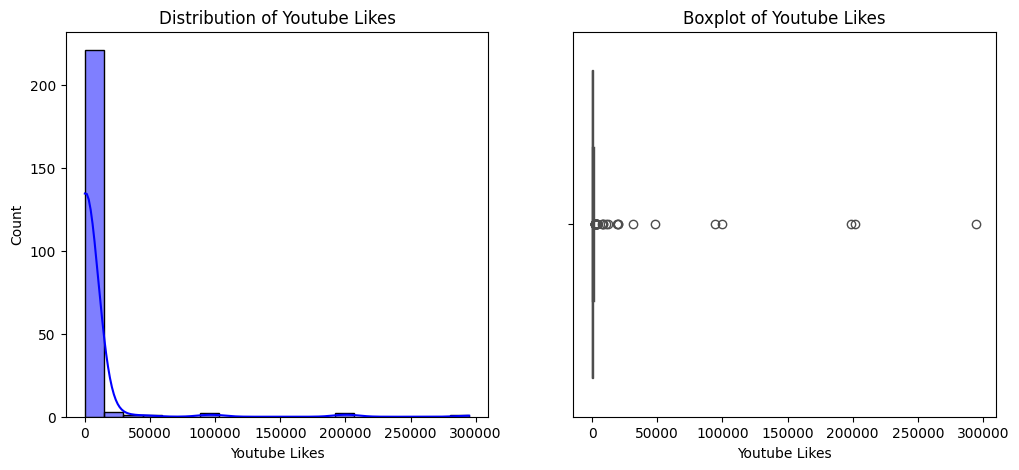

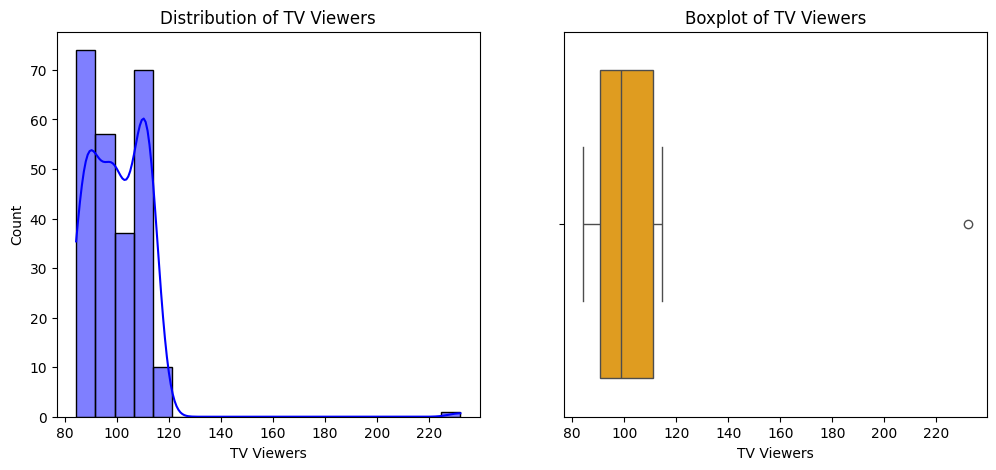

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


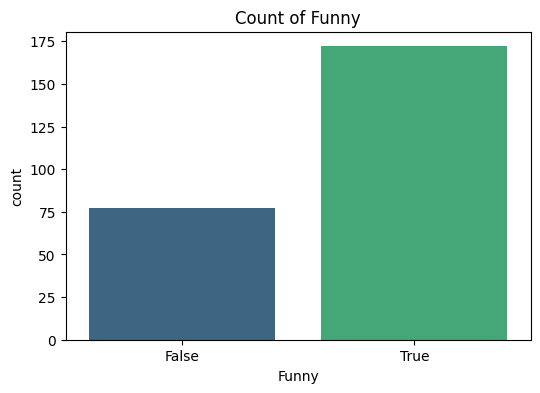

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


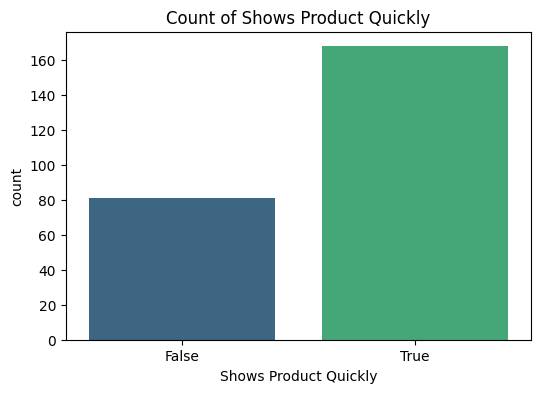

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


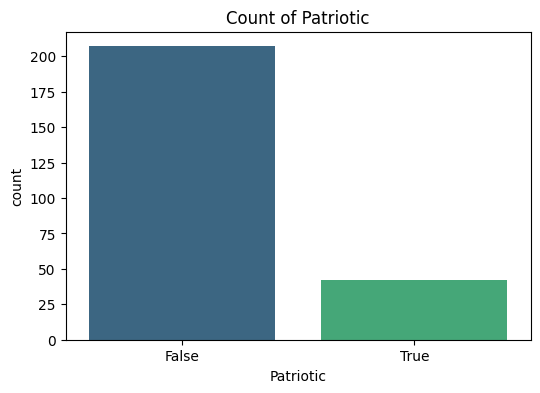

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


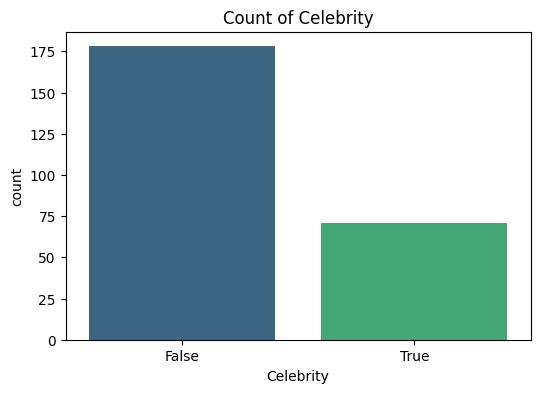

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


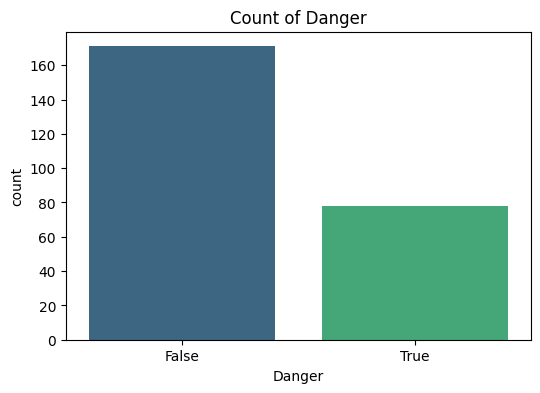

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


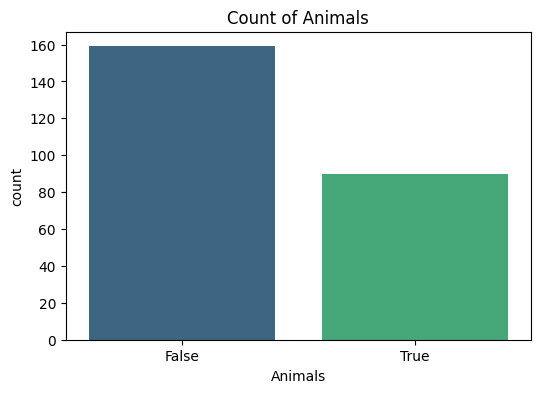

<ipython-input-3-54170feed3a0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


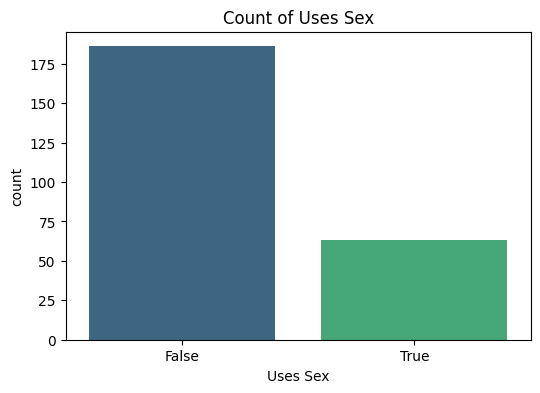

<ipython-input-3-54170feed3a0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='coolwarm')


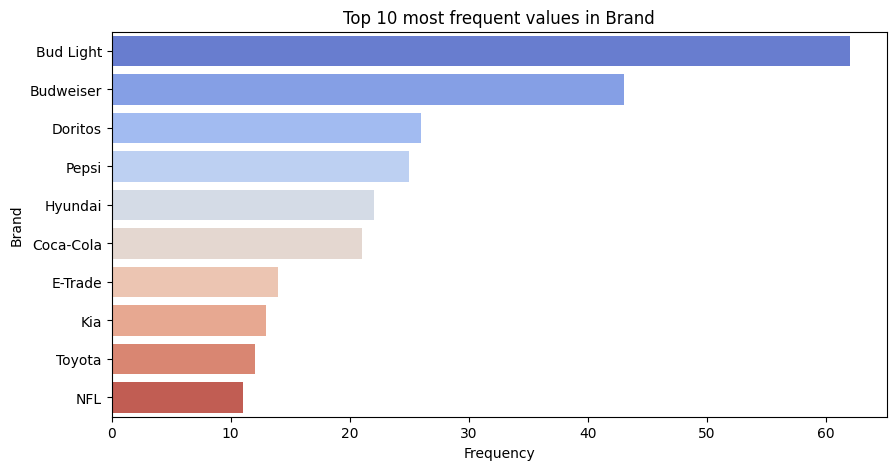

<ipython-input-3-54170feed3a0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='coolwarm')


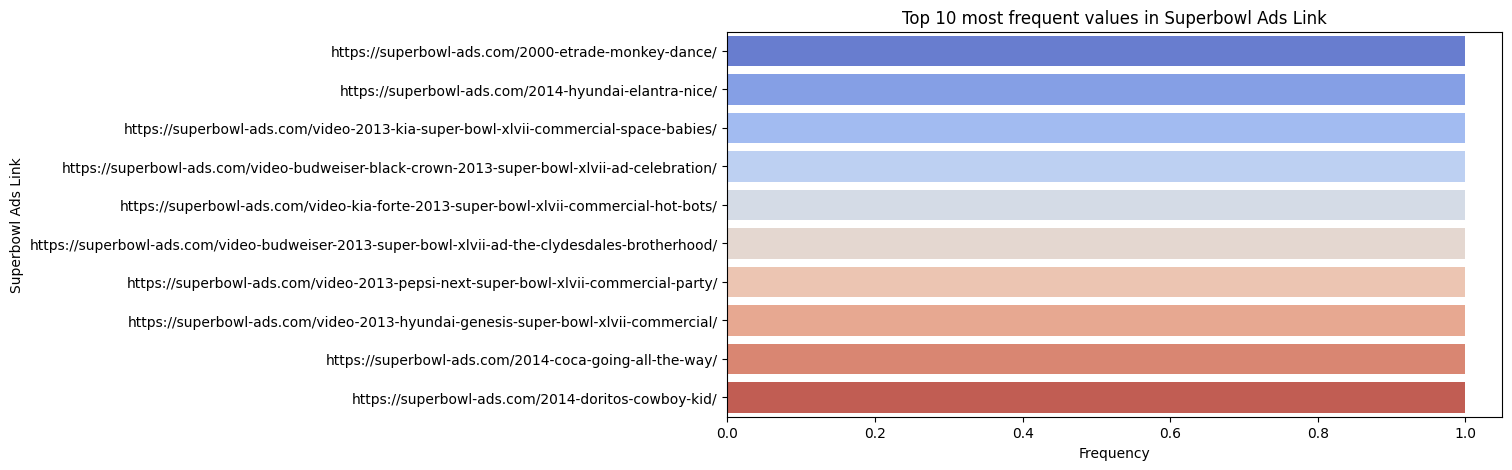

<ipython-input-3-54170feed3a0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='coolwarm')


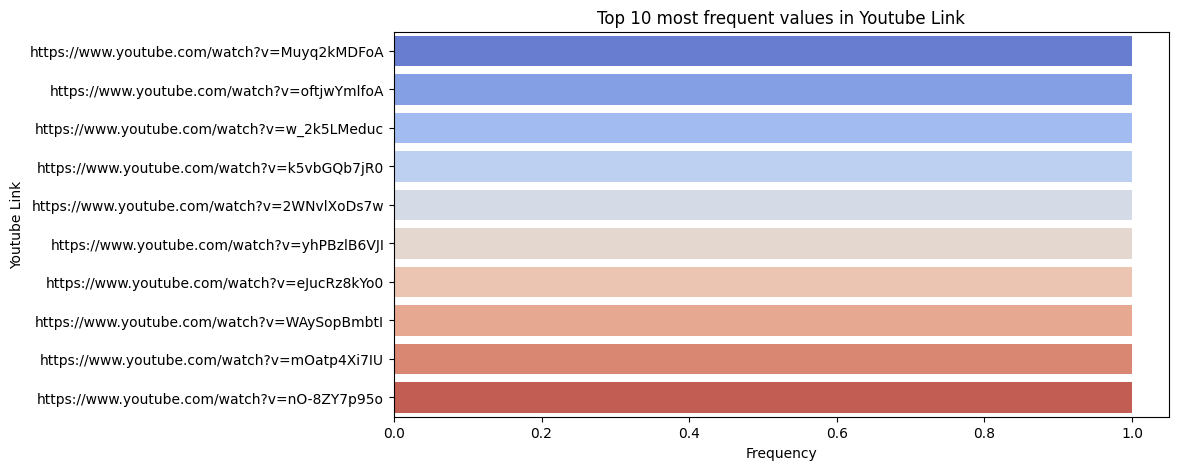

In [3]:
def univariate_analysis(data):
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    boolean_cols = data.select_dtypes(include=['bool']).columns
    object_cols = data.select_dtypes(include=['object']).columns

    # Numeric columns: Histograms and boxplots
    for col in numeric_cols:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, bins=20, color='blue')
        plt.title(f"Distribution of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col], color='orange')
        plt.title(f"Boxplot of {col}")
        plt.show()

    # Boolean columns: Count plots
    for col in boolean_cols:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=data[col], palette='viridis')
        plt.title(f"Count of {col}")
        plt.show()

    # Categorical columns: Frequency counts (Top 10 values if necessary)
    for col in object_cols:
        plt.figure(figsize=(10, 5))
        top_values = data[col].value_counts().head(10)
        sns.barplot(x=top_values.values, y=top_values.index, palette='coolwarm')
        plt.title(f"Top 10 most frequent values in {col}")
        plt.xlabel("Frequency")
        plt.ylabel(col)
        plt.show()

univariate_analysis(data)


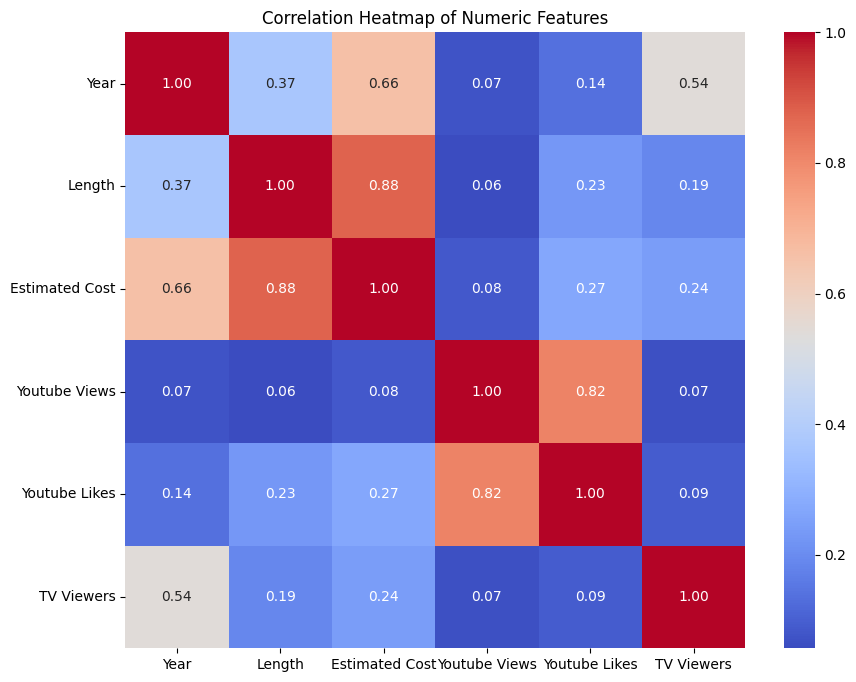

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


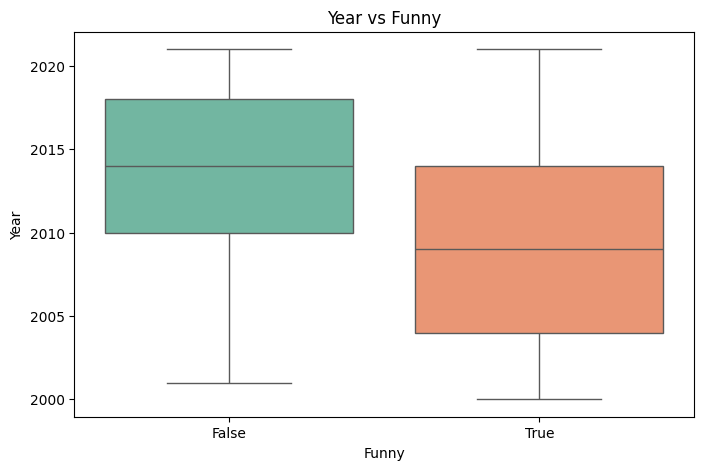

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


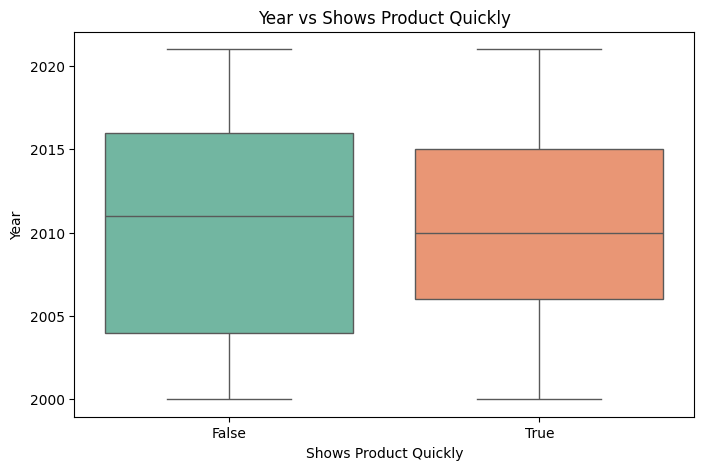

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


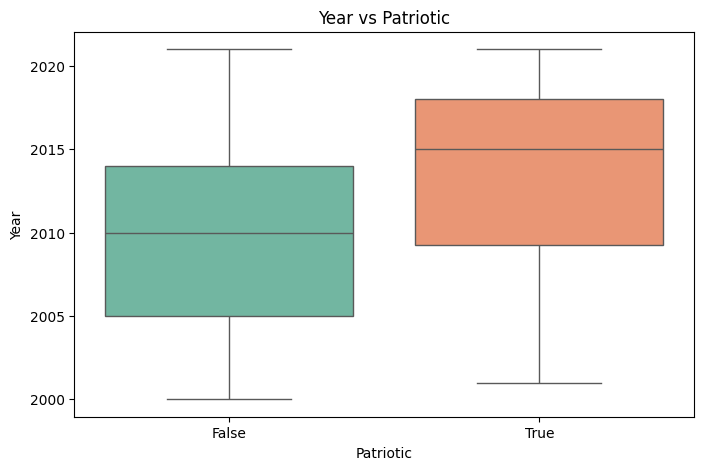

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


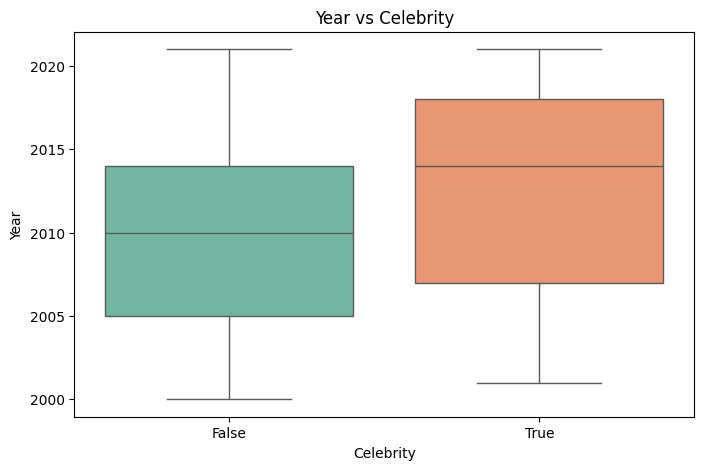

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


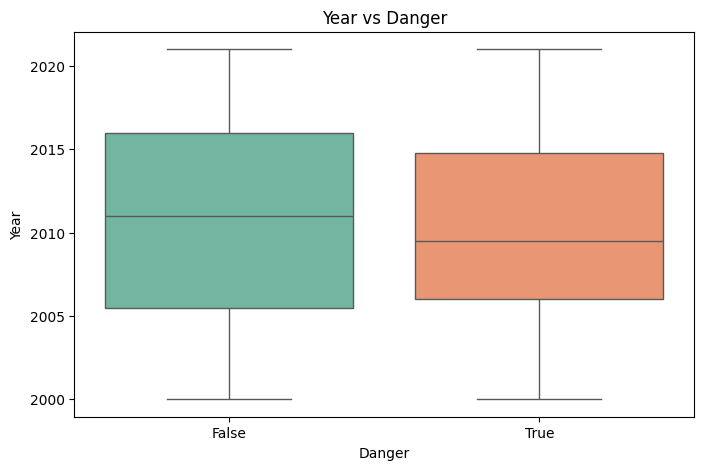

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


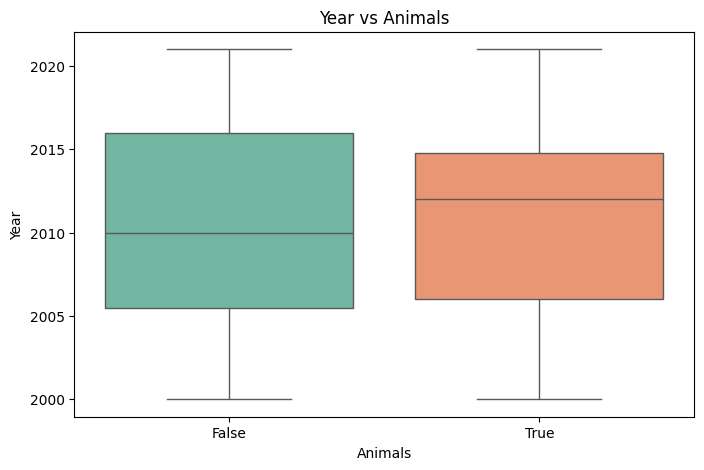

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


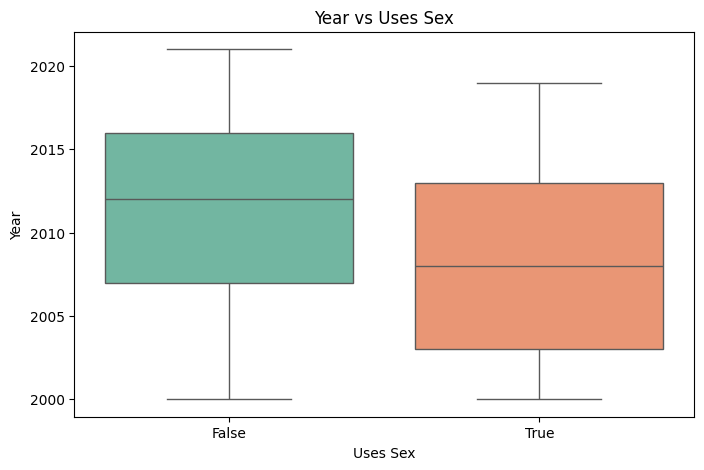

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


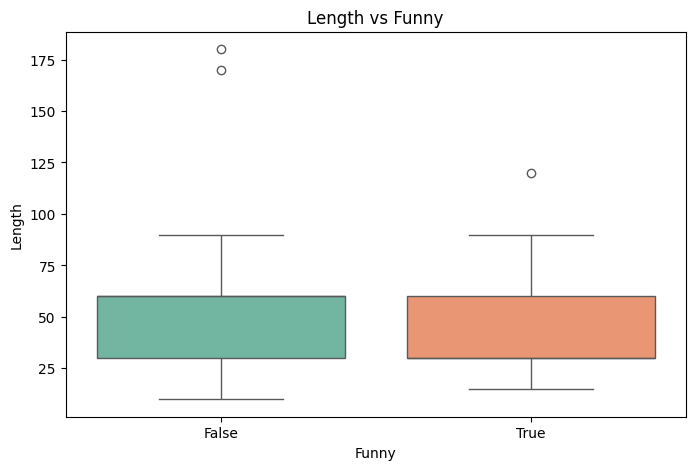

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


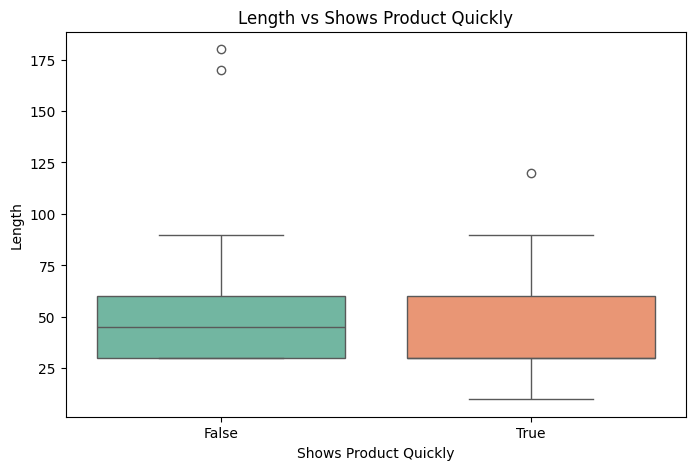

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


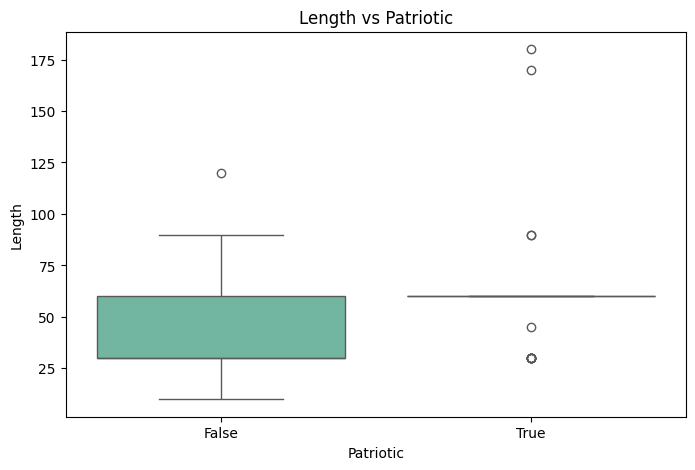

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


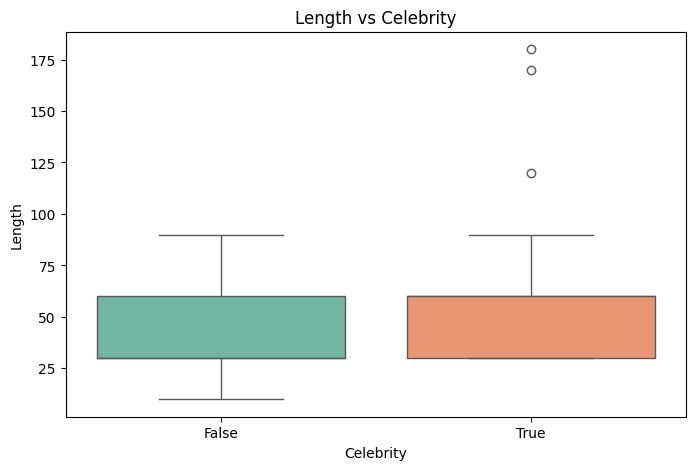

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


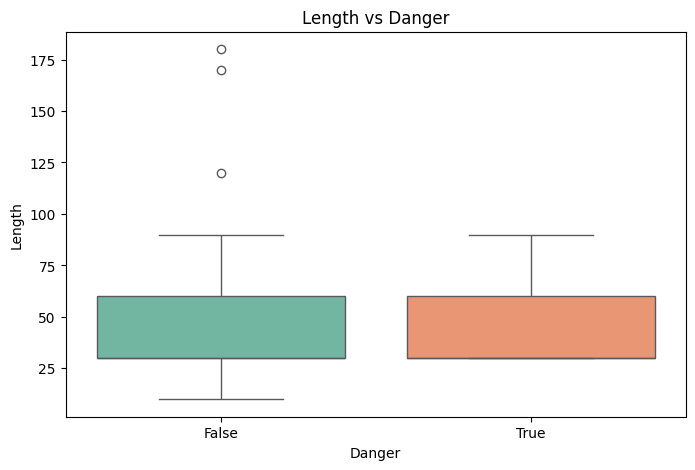

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


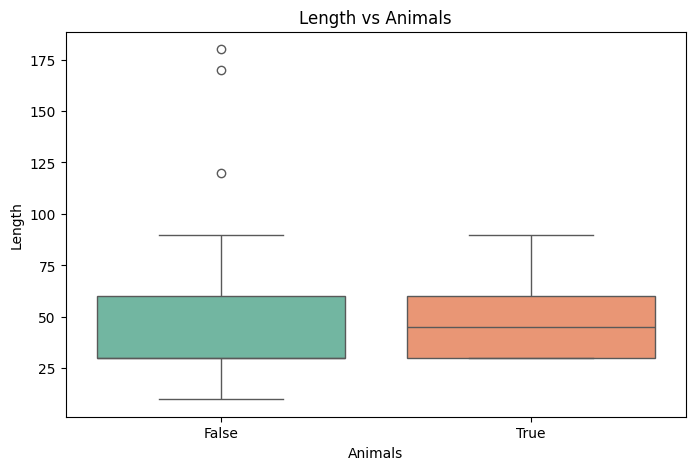

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


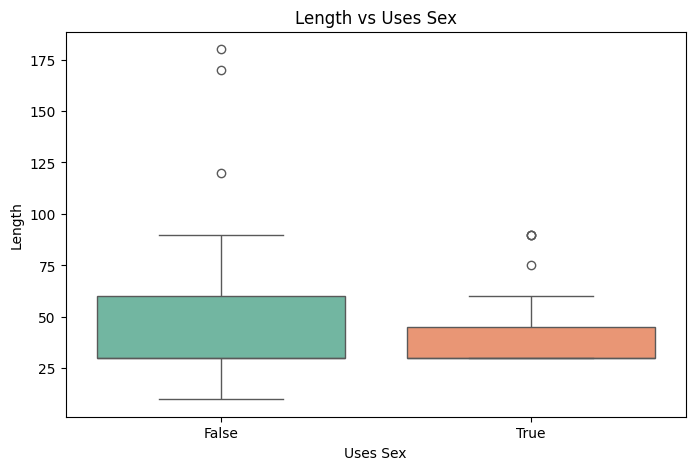

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


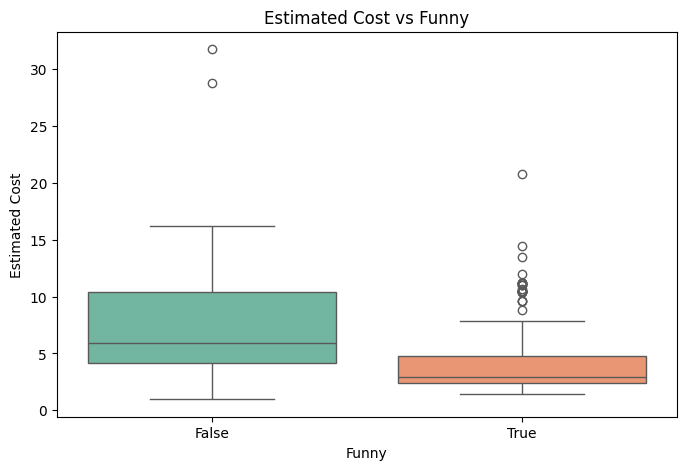

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


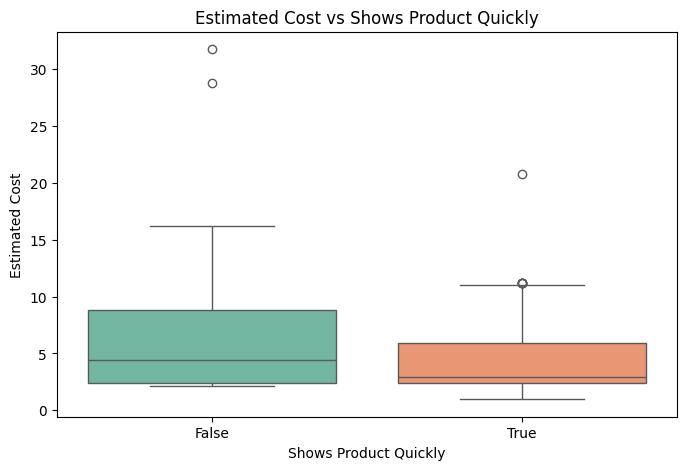

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


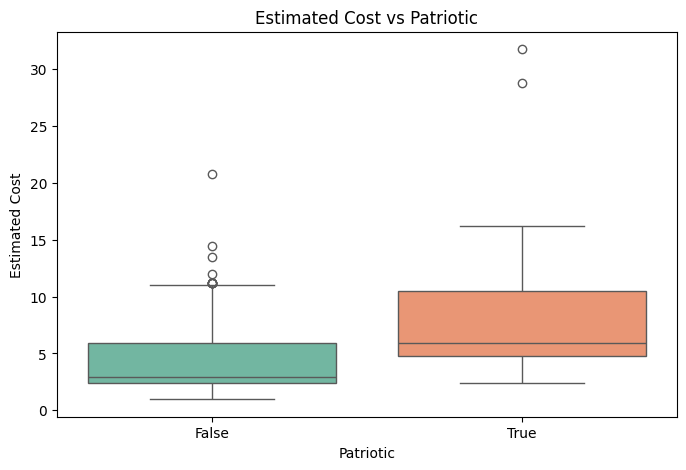

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


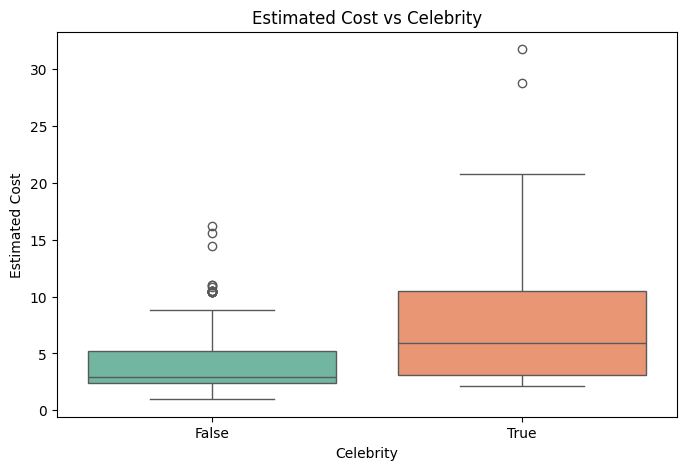

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


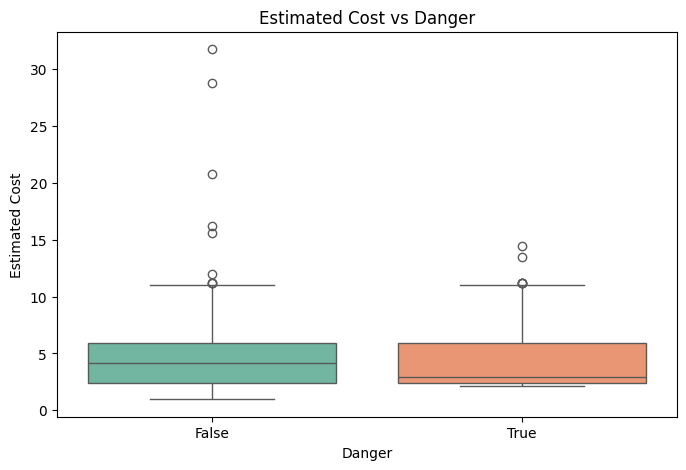

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


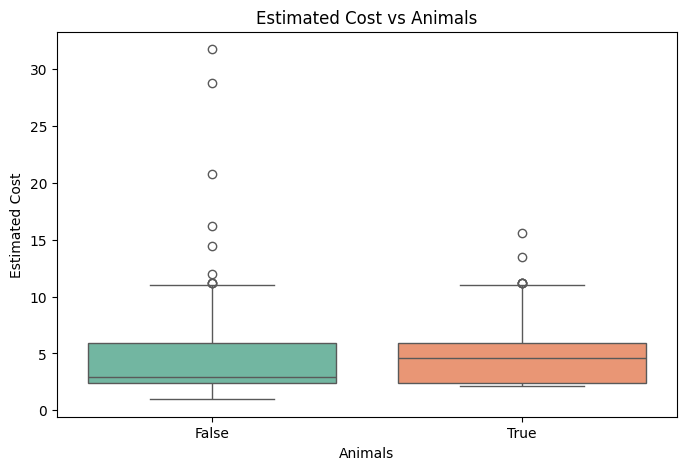

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


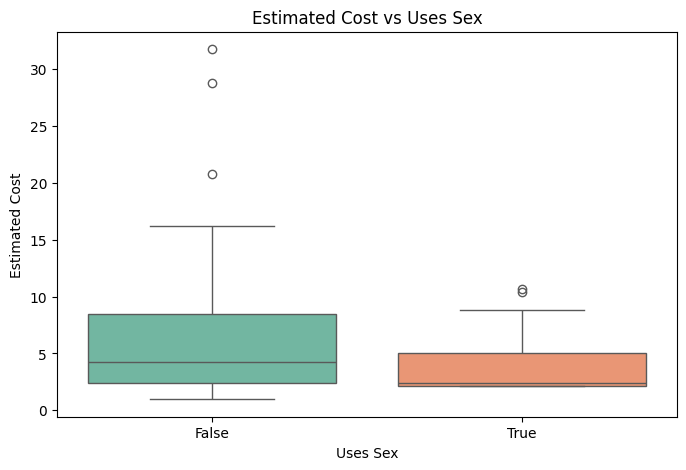

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


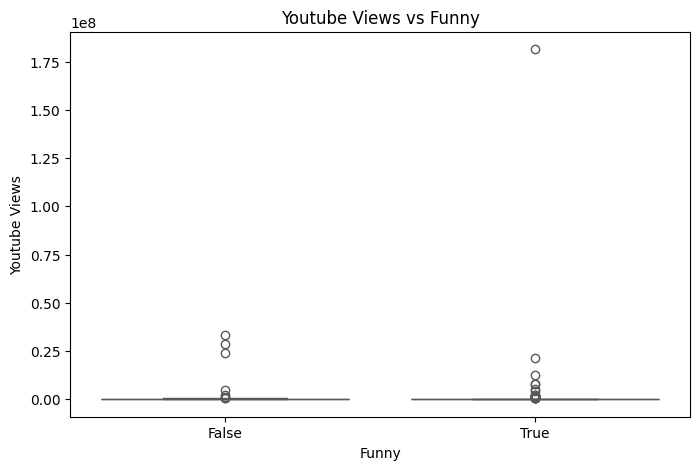

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


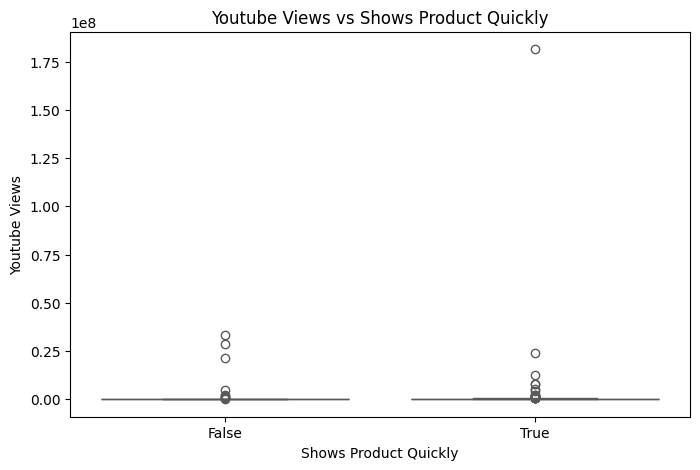

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


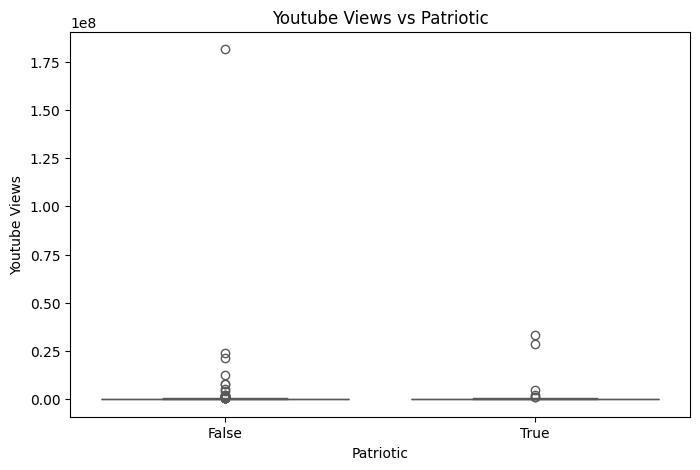

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


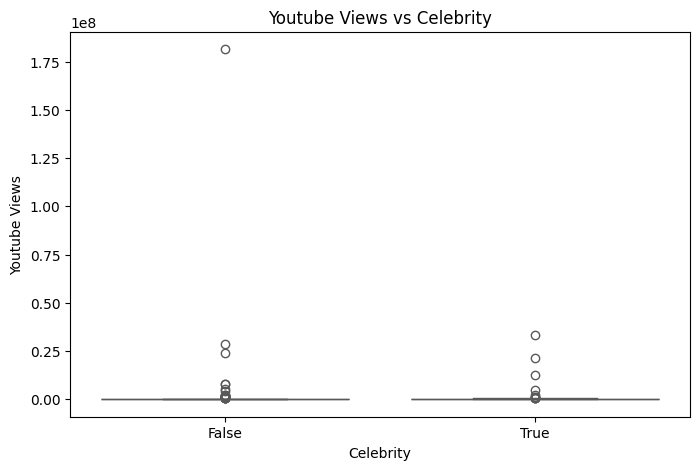

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


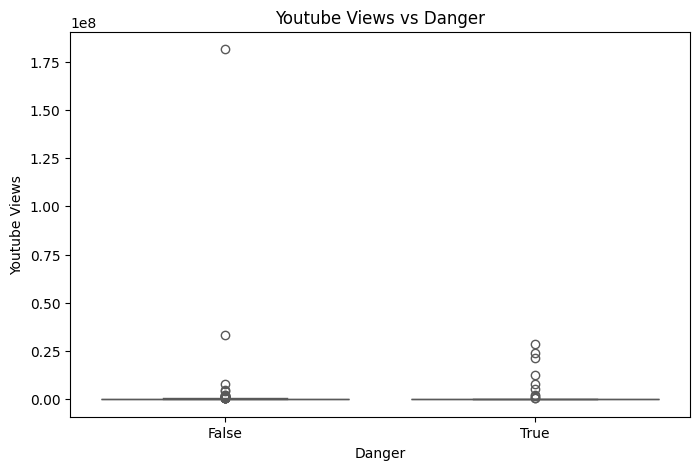

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


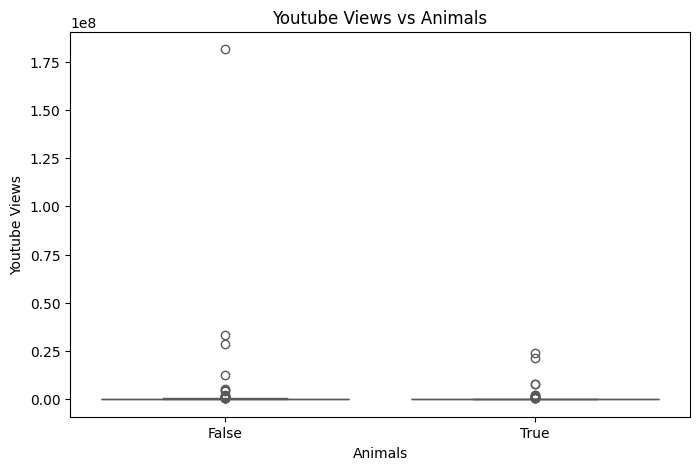

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


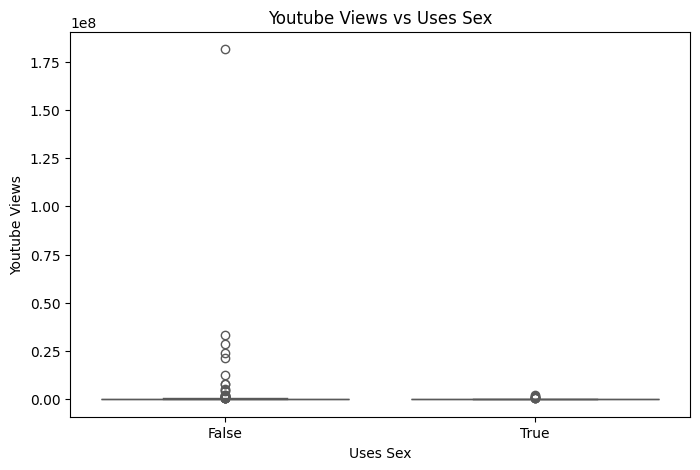

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


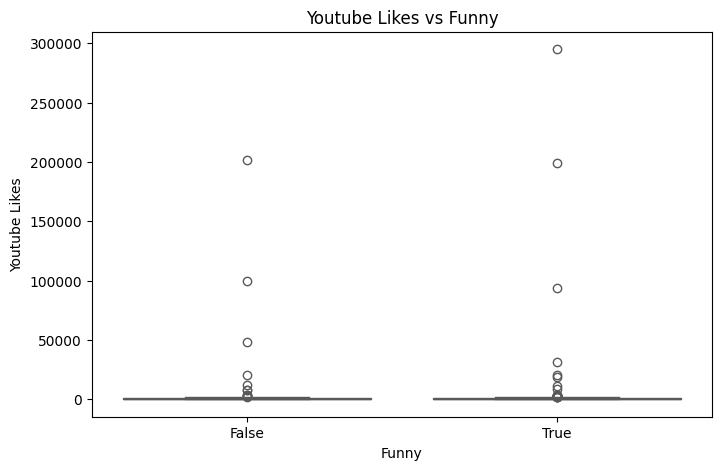

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


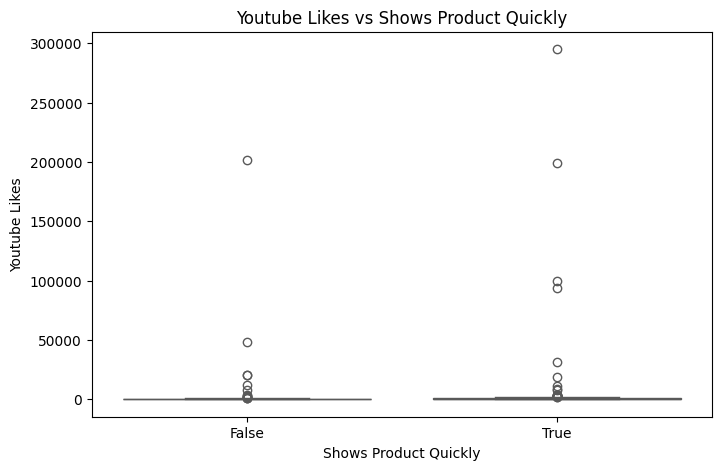

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


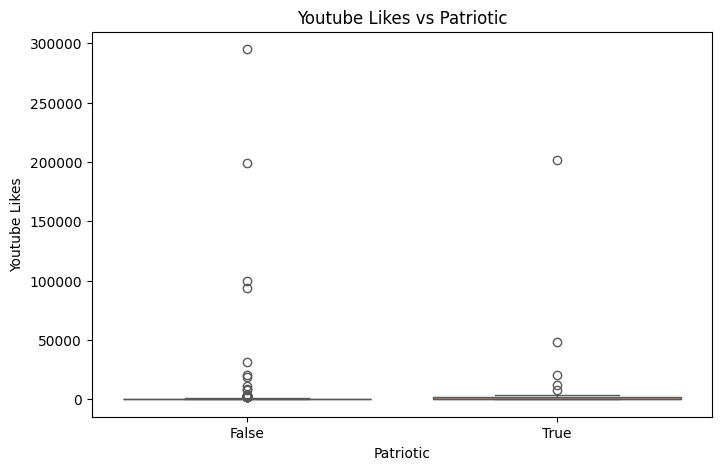

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


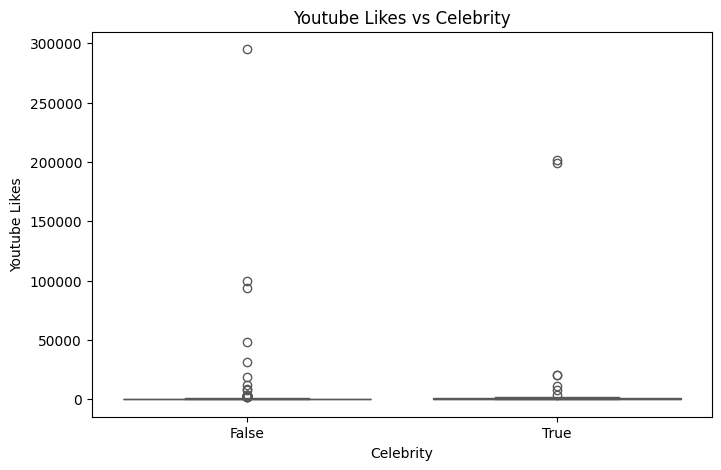

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


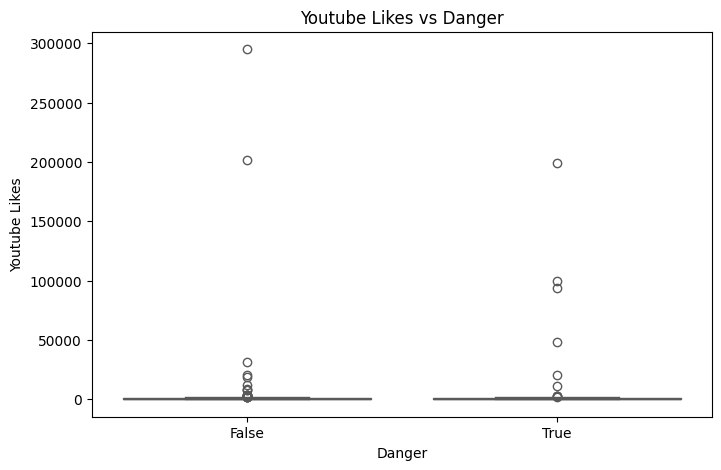

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


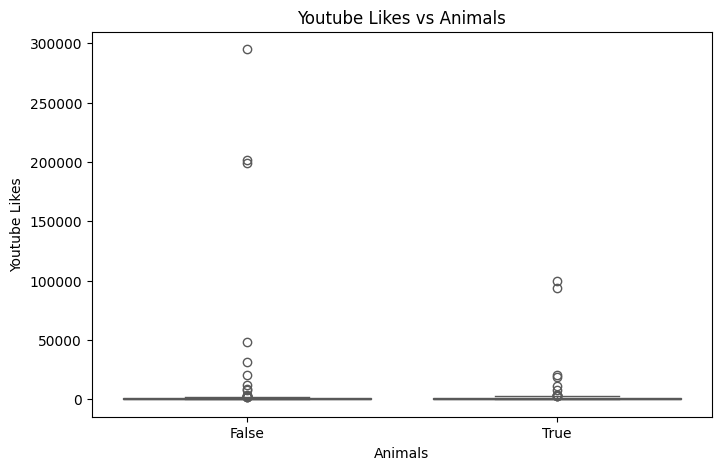

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


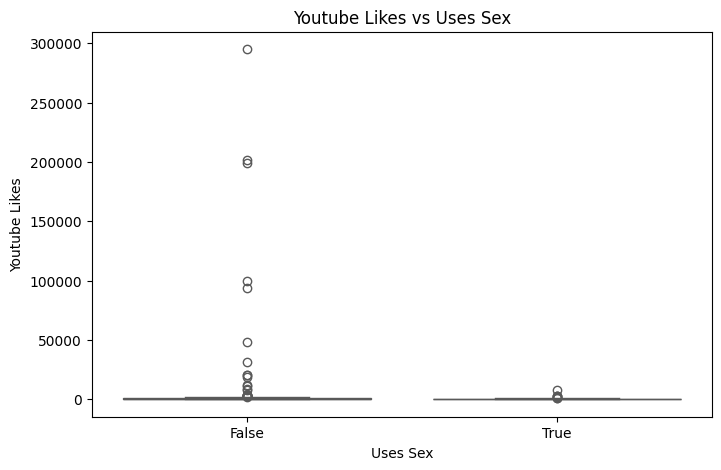

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


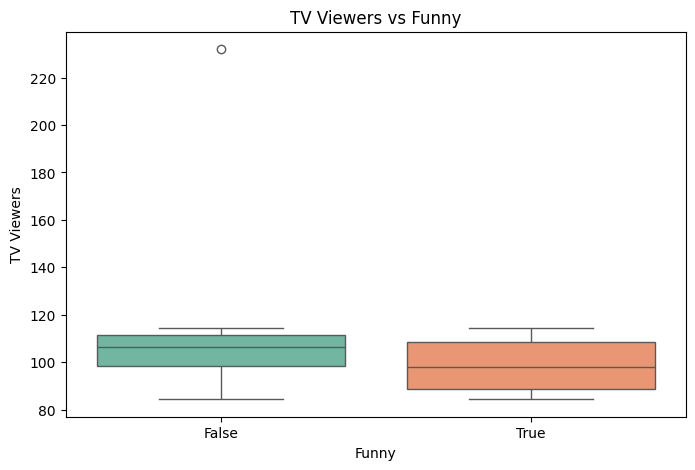

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


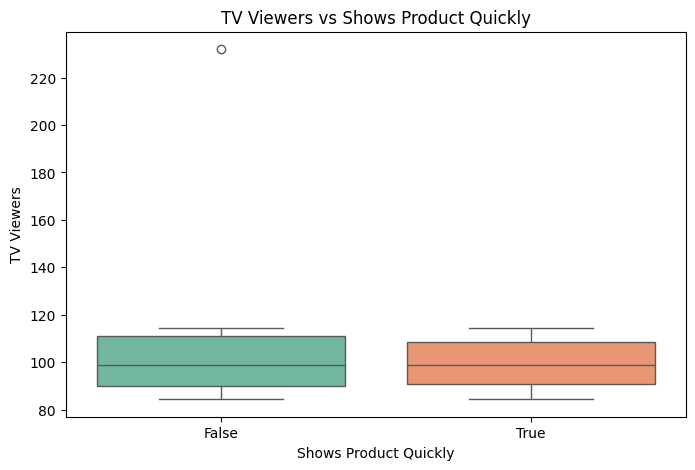

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


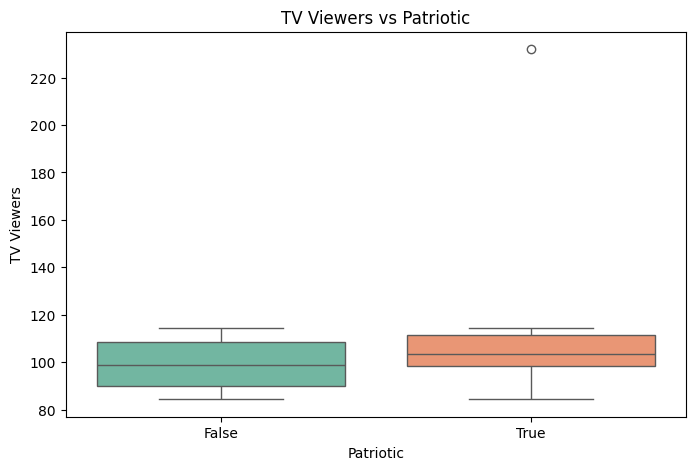

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


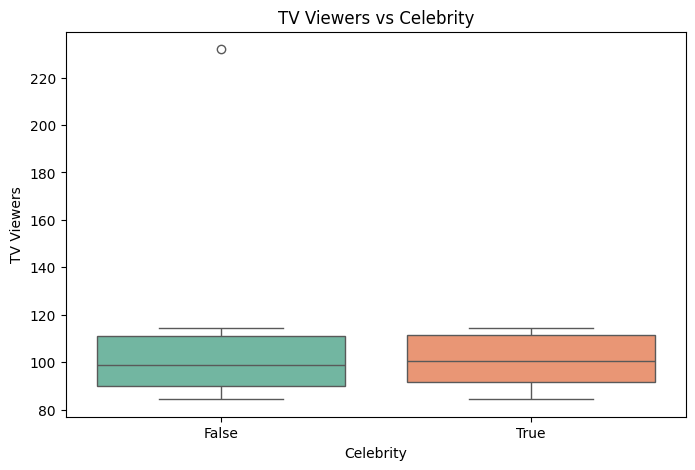

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


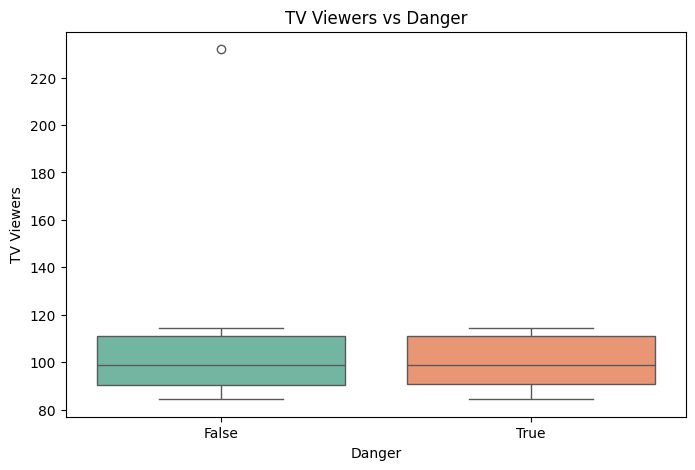

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


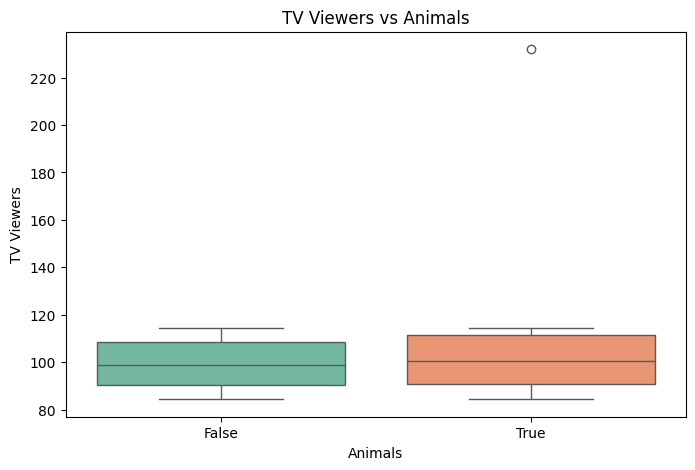

<ipython-input-4-aa758ae1cde1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')


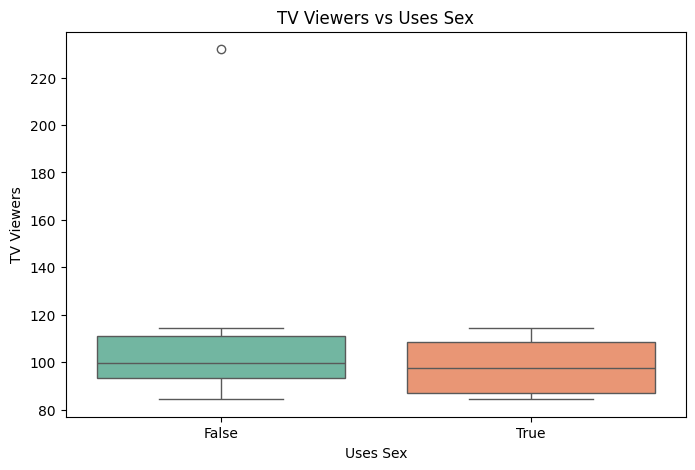

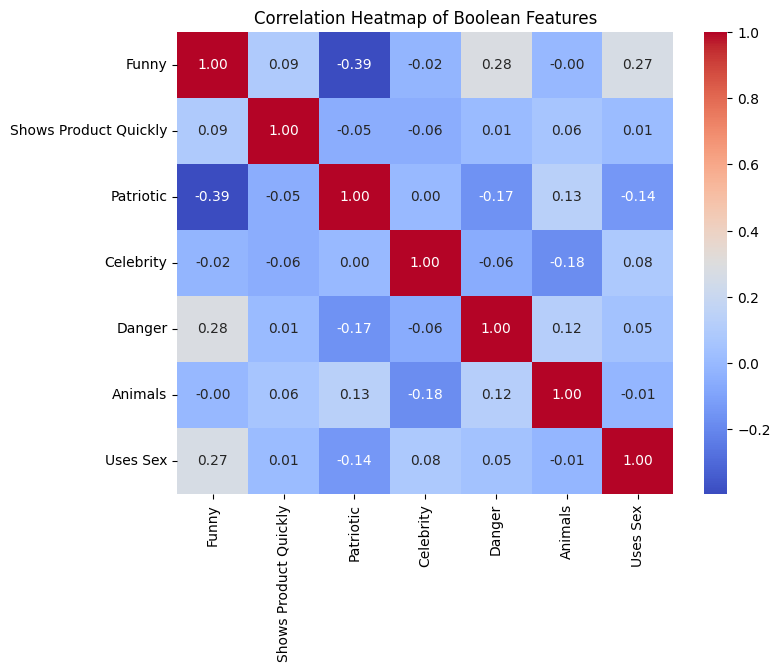

In [4]:
def bivariate_analysis(data):
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    boolean_cols = data.select_dtypes(include=['bool']).columns

    # Numeric vs Numeric: Correlation heatmap
    corr_matrix = data[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()

    # Numeric vs Boolean: Boxplots
    for num_col in numeric_cols:
        for bool_col in boolean_cols:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=data[bool_col], y=data[num_col], palette='Set2')
            plt.title(f"{num_col} vs {bool_col}")
            plt.xlabel(bool_col)
            plt.ylabel(num_col)
            plt.show()

    # Boolean vs Boolean: Cross-tabulations (heatmap)
    bool_data = data[boolean_cols].astype(int)
    bool_corr = bool_data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(bool_corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Boolean Features")
    plt.show()

bivariate_analysis(data)


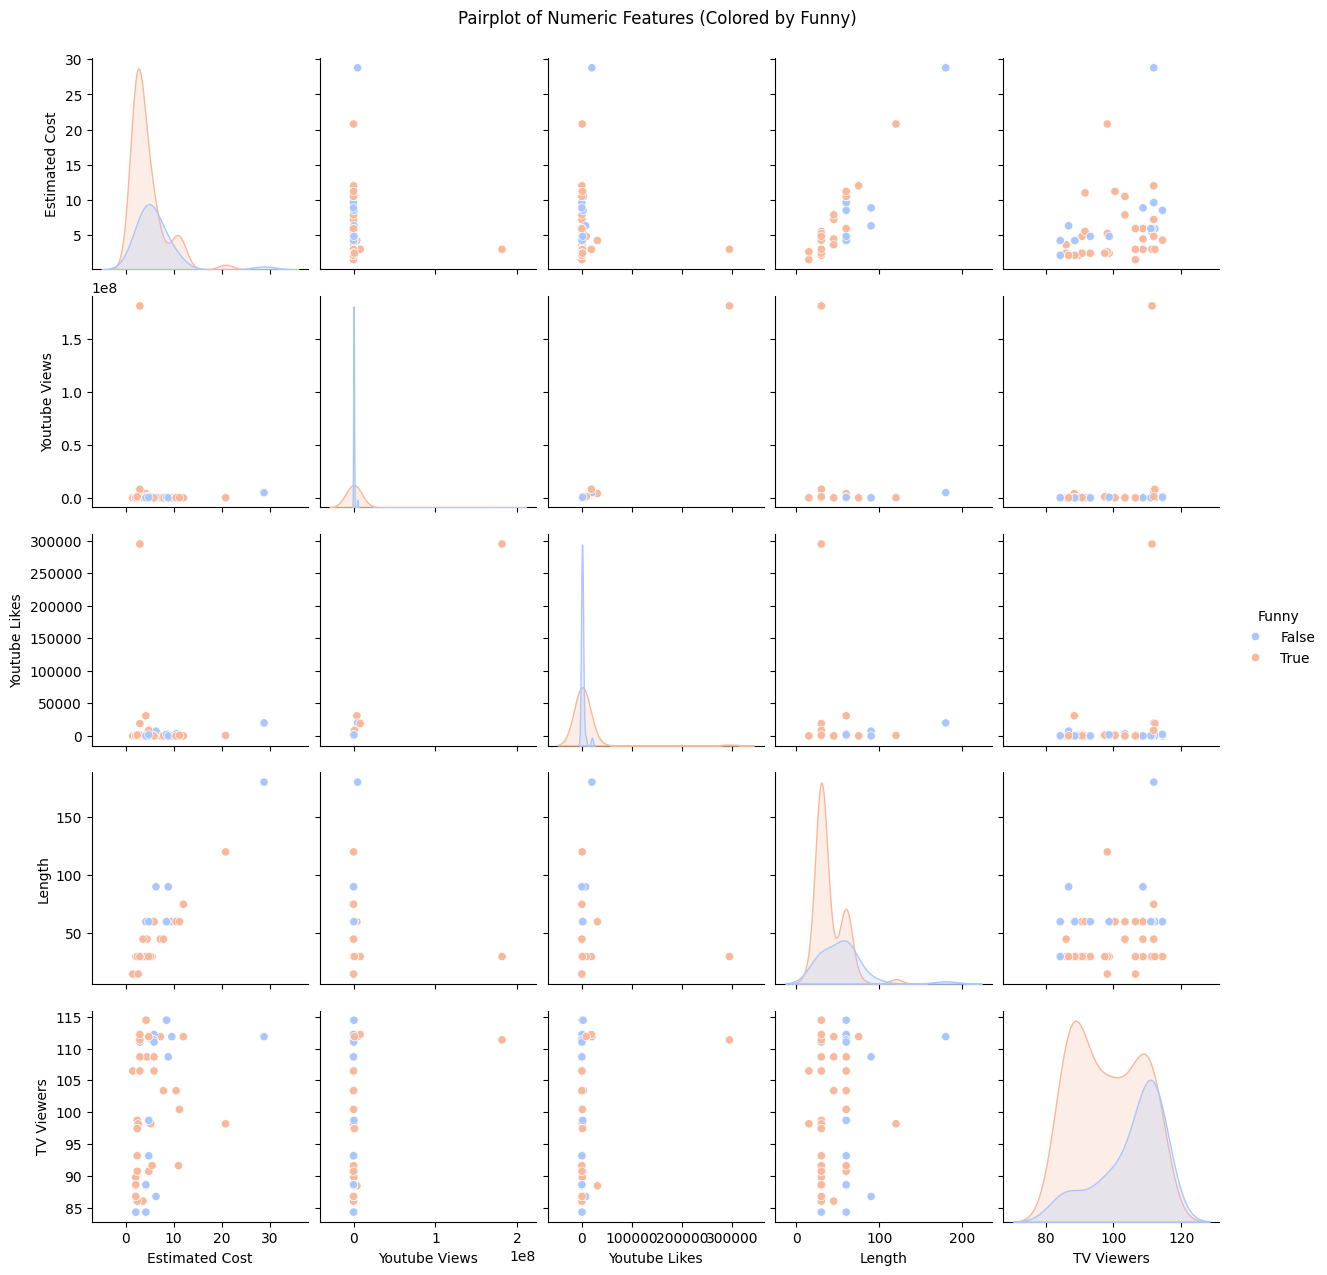

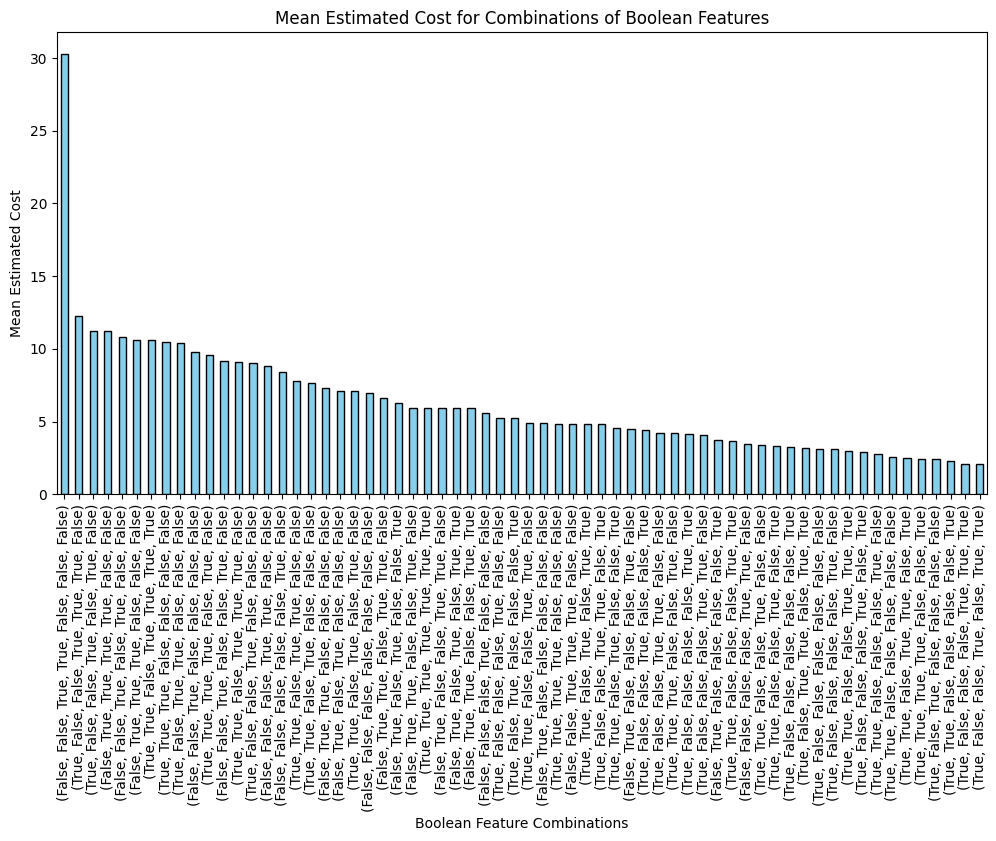

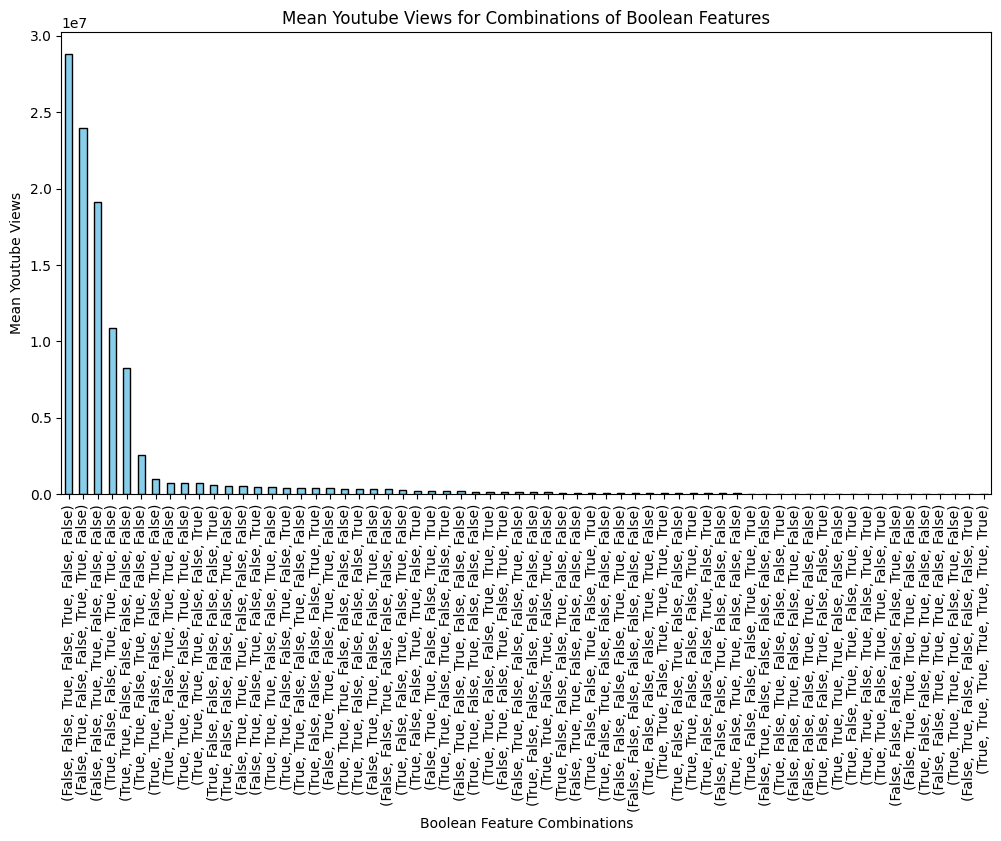

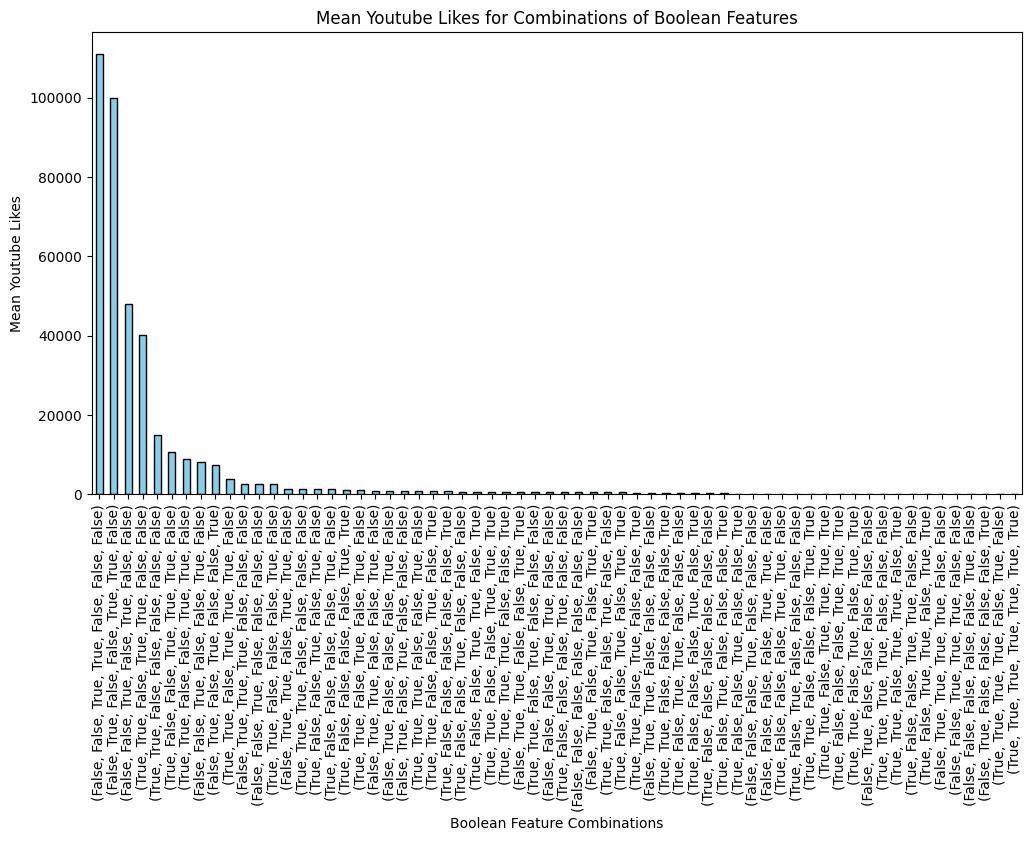

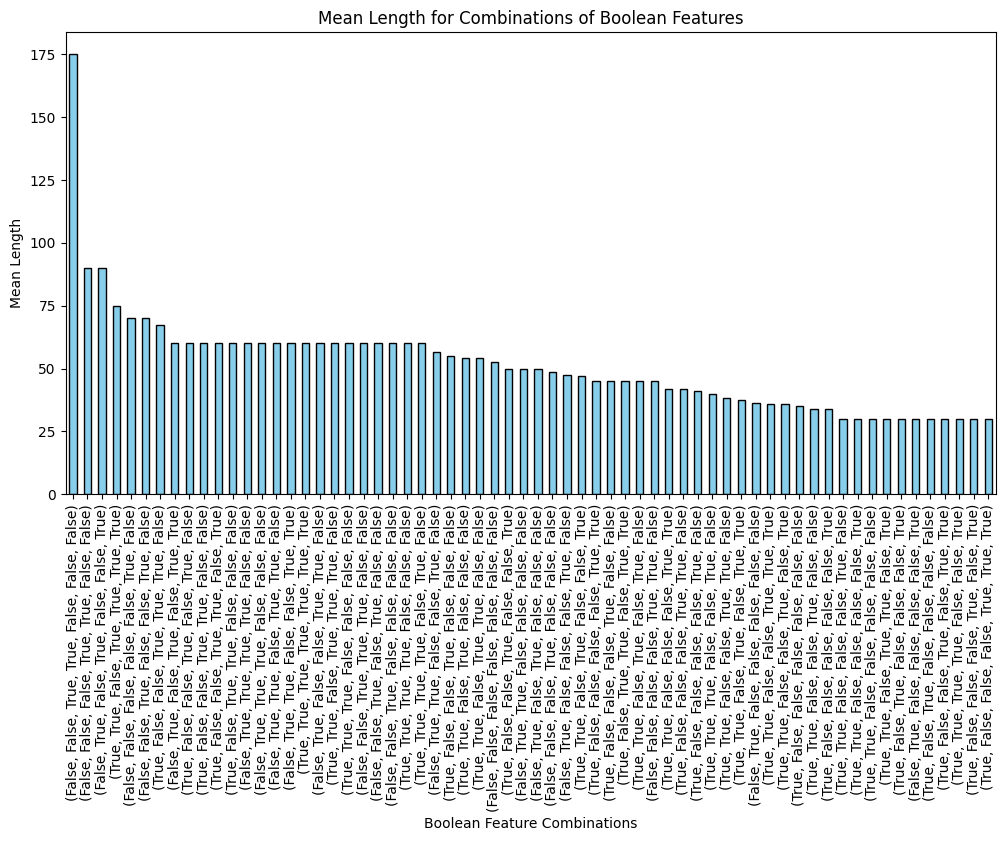

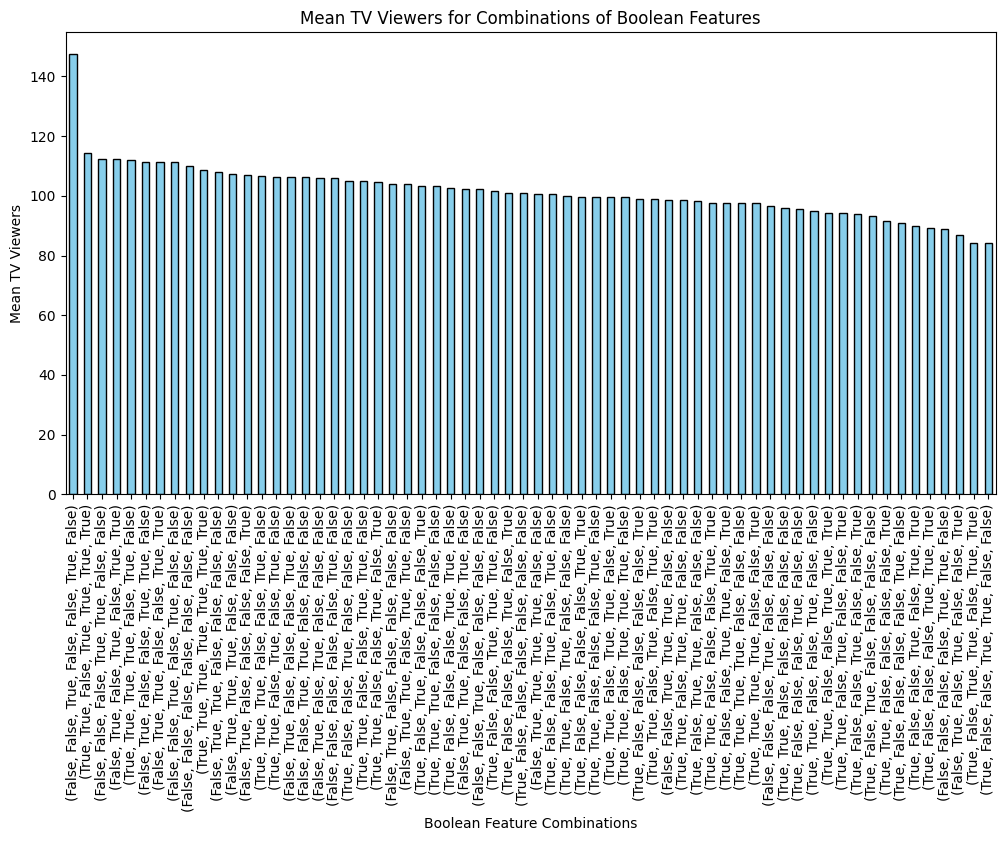

In [5]:
def multivariate_analysis(data):
    # Pairplot for Numeric Variables (Sampled for visibility)
    sampled_data = data.sample(100, random_state=42)
    numeric_cols = ['Estimated Cost', 'Youtube Views', 'Youtube Likes', 'Length', 'TV Viewers']
    sns.pairplot(sampled_data, vars=numeric_cols, hue="Funny", palette="coolwarm", diag_kind="kde")
    plt.suptitle("Pairplot of Numeric Features (Colored by Funny)", y=1.02)
    plt.show()

    # Grouped analysis for boolean and numeric interactions
    boolean_cols = data.select_dtypes(include=['bool']).columns
    for num_col in numeric_cols:
        plt.figure(figsize=(12, 6))
        group_means = data.groupby(boolean_cols.tolist())[num_col].mean().sort_values(ascending=False)
        group_means.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"Mean {num_col} for Combinations of Boolean Features")
        plt.ylabel(f"Mean {num_col}")
        plt.xlabel("Boolean Feature Combinations")
        plt.show()

multivariate_analysis(data)


In [6]:
#time series analysis
# Ensure 'Year' is in datetime format (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Sort by year to ensure chronological order
data = data.sort_values(by='Year')
data.set_index('Year', inplace=True)

# Preview the data
data.head()


Brand                                 Superbowl Ads Link  \
Year                                                                       
2000-01-01    E-Trade  https://superbowl-ads.com/2000-etrade-monkey-d...   
2000-01-01    E-Trade  https://superbowl-ads.com/2000-etrade-money-ou...   
2000-01-01  Budweiser  https://superbowl-ads.com/2000-budweiser-whaas...   
2000-01-01  Bud Light  https://superbowl-ads.com/2000-bud-light-hold-...   
2000-01-01  Budweiser  https://superbowl-ads.com/2000-budweiser-talki...   

                                           Youtube Link  Funny  \
Year                                                             
2000-01-01  https://www.youtube.com/watch?v=Muyq2kMDFoA   True   
2000-01-01  https://www.youtube.com/watch?v=oftjwYmlfoA   True   
2000-01-01  https://www.youtube.com/watch?v=loimTUjV92Q   True   
2000-01-01  https://www.youtube.com/watch?v=M3IV93HwSkc   True   
2000-01-01  https://www.youtube.com/watch?v=dK1tlG778J8   True   

            Shows Product Quickly  Patriotic  Celebrity  Danger  Animals  \
Year                                                                       
2000-01-01                   True      False      False   False     True   
2000-01-01                   True      False      False    True    False   
2000-01-01                   True      False      False   False    False   
2000-01-01                   True      False      False    True    False   
2000-01-01                  False      False      False   False     True   

            Uses Sex  Length  Estimated Cost  Youtube Views  Youtube Likes  \
Year                                                                         
2000-01-01     False      30             2.1        13615.0           84.0   
2000-01-01     False      30             2.1        72772.0          146.0   
2000-01-01     False      30             2.1         5399.0           11.0   
2000-01-01     False      30             2.1         6699.0            8.0   
2000-01-01     False      30             2.1        18972.0            6.0   

            TV Viewers  
Year                    
2000-01-01       88.47  
2000-01-01       88.47  
2000-01-01       88.47  
2000-01-01       88.47  
2000-01-01       88.47

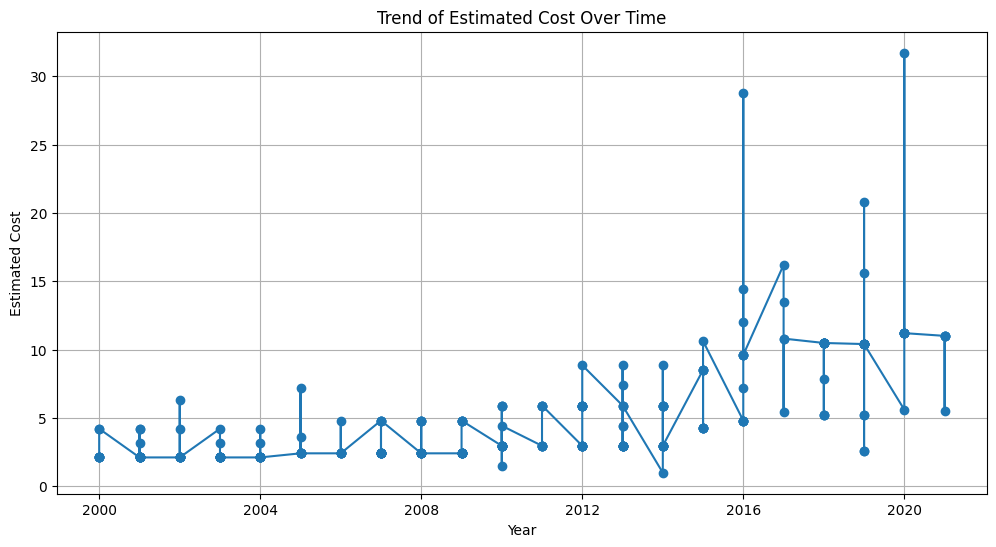

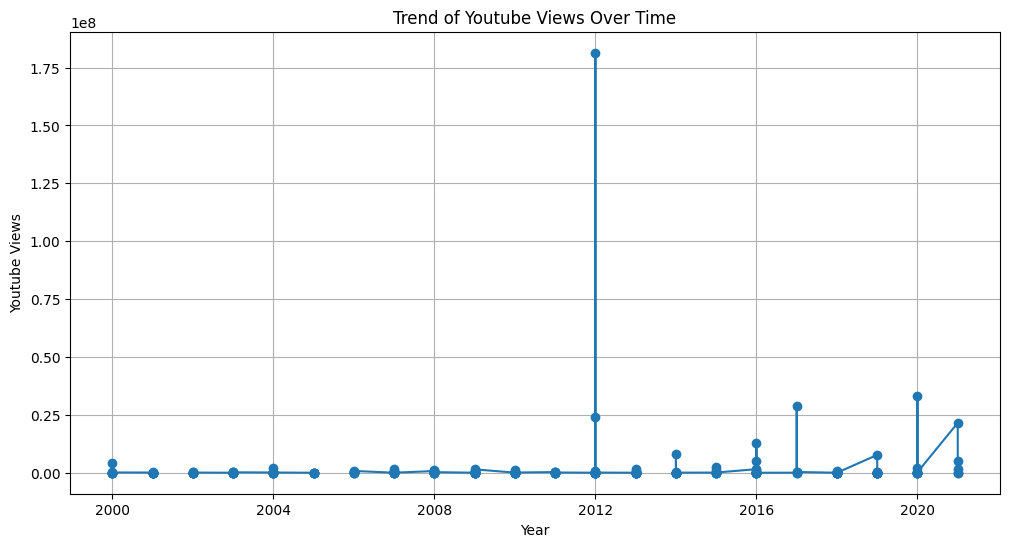

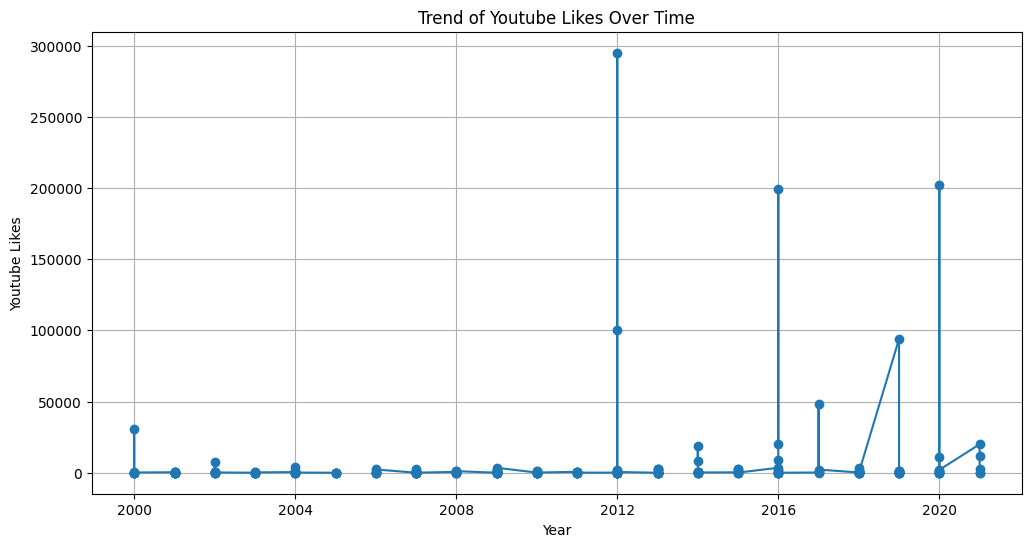

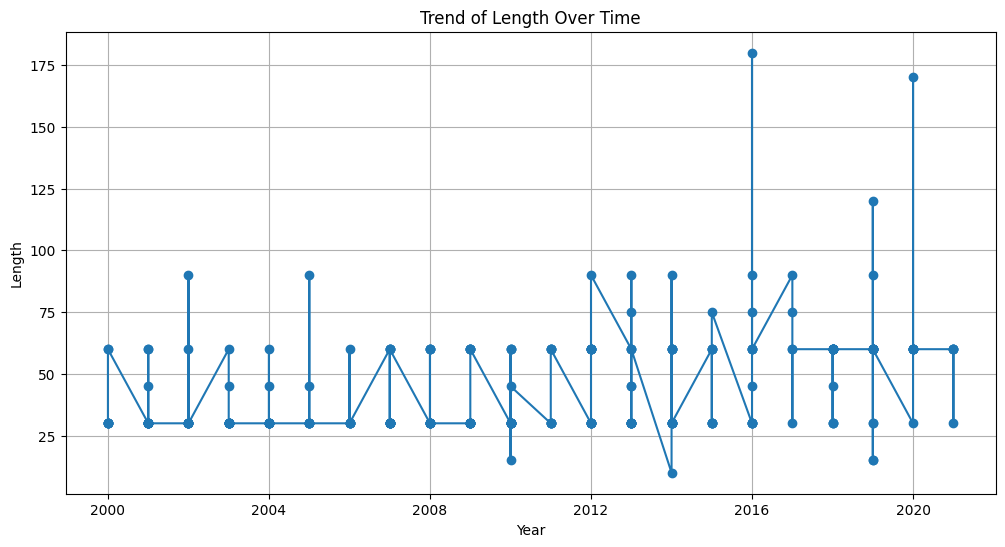

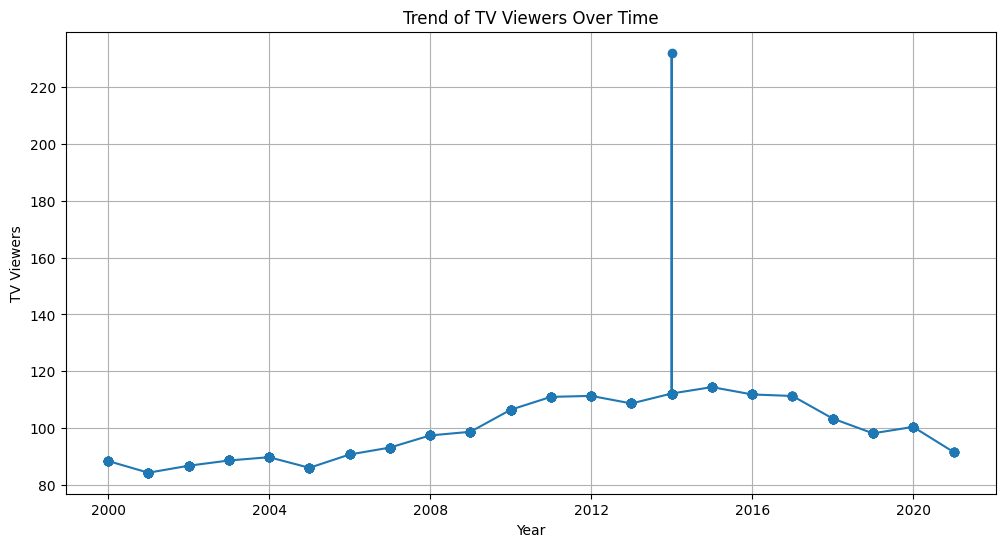

In [7]:
# Univariate analysis for numeric features
numeric_cols = ['Estimated Cost', 'Youtube Views', 'Youtube Likes', 'Length', 'TV Viewers']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], marker='o')
    plt.title(f"Trend of {col} Over Time")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


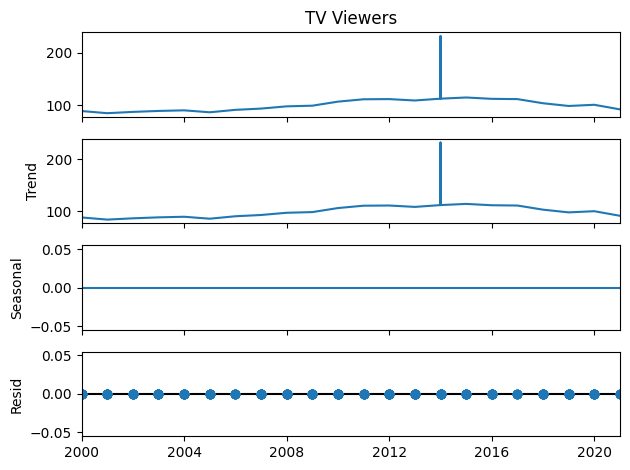

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition on one variable (e.g., TV Viewers)
decompose_result = seasonal_decompose(data['TV Viewers'], model='additive', period=1)  # Assuming yearly frequency

# Plot decomposition
decompose_result.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1370: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1370: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


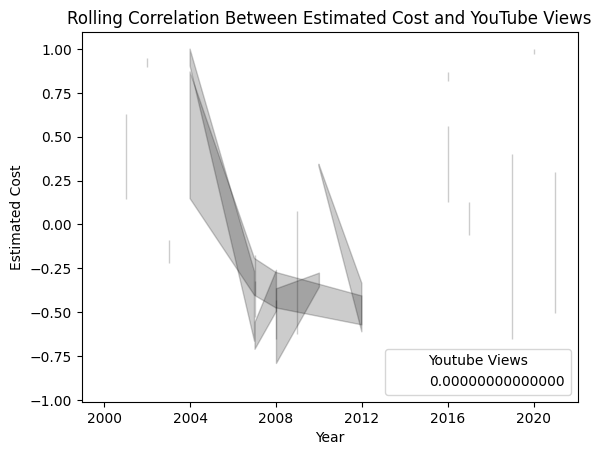

In [9]:
# Rolling Correlation
rolling_corr = data[['Estimated Cost', 'Youtube Views']].rolling(window=5).corr()
rolling_corr = rolling_corr.reset_index()

# Plot rolling correlation
sns.lineplot(data=rolling_corr, x='Year', y='Estimated Cost', hue='Youtube Views')
plt.title("Rolling Correlation Between Estimated Cost and YouTube Views")
plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model on 'TV Viewers'
model = ARIMA(data['TV Viewers'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast for next 5 years
forecast = model_fit.forecast(steps=5)
print("Forecasted TV Viewers for the next 5 years:")
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted TV Viewers for the next 5 years:
249    95.358927
250    95.454852
251    95.457320
252    95.457384
253    95.457385
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
# Reset the index to make it unique
data.reset_index(inplace=True)


In [16]:
# Drop duplicate index rows
data = data.loc[~data.index.duplicated()]


In [17]:
# Drop rows with missing values from the original dataset
data_filtered = data[['Youtube Views', 'Estimated Cost', 'TV Viewers']].dropna()

# Add the cluster labels to the filtered dataset
data_filtered['Cluster'] = clusters

# Merge the cluster labels back to the original dataset
data['Cluster'] = None  # Initialize the cluster column
data.loc[data_filtered.index, 'Cluster'] = data_filtered['Cluster']


In [18]:
# Check for duplicate indices
duplicates = data.index[data.index.duplicated()]
print("Duplicate indices:", duplicates)


Duplicate indices: Index([], dtype='int64')


In [19]:
# Reset the index to avoid duplicate index issues
data.reset_index(inplace=True, drop=True)

# Filter data for clustering (drop missing rows)
data_filtered = data[['Youtube Views', 'Estimated Cost', 'TV Viewers']].dropna()

# Apply clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_filtered)

# Add cluster labels back to the filtered dataset
data_filtered['Cluster'] = clusters

# Initialize 'Cluster' in the original dataset and merge the filtered labels
data['Cluster'] = None
data.loc[data_filtered.index, 'Cluster'] = data_filtered['Cluster']


In [22]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Assuming the file is named 'superbowl_commercials.csv'
data = pd.read_csv('superbowl_commercials.csv')


Saving superbowl_commercials.csv to superbowl_commercials (2).csv


In [23]:
# List all files in the current directory
import os
print(os.listdir())

# Load the dataset (replace the file name if necessary)
data = pd.read_csv('superbowl_commercials.csv')


['.config', 'superbowl_commercials.csv', 'superbowl_commercials (1).csv', 'drive', 'superbowl_commercials (2).csv', 'sample_data']


In [24]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the file to your Google Drive
data.to_csv('/content/drive/My Drive/superbowl_commercials.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cluster Analysis:
          Estimated Cost  Youtube Views  Youtube Likes     Length  TV Viewers
Cluster                                                                     
0              4.988004   3.041902e+05    1382.235185  43.744856  100.330864
1              2.950000   1.814238e+08  295000.000000  30.000000  111.350000
2             13.806000   2.406411e+07  113800.000000  82.000000  105.322000

Cluster Counts:
 Cluster
0    243
2      5
1      1
Name: count, dtype: int64


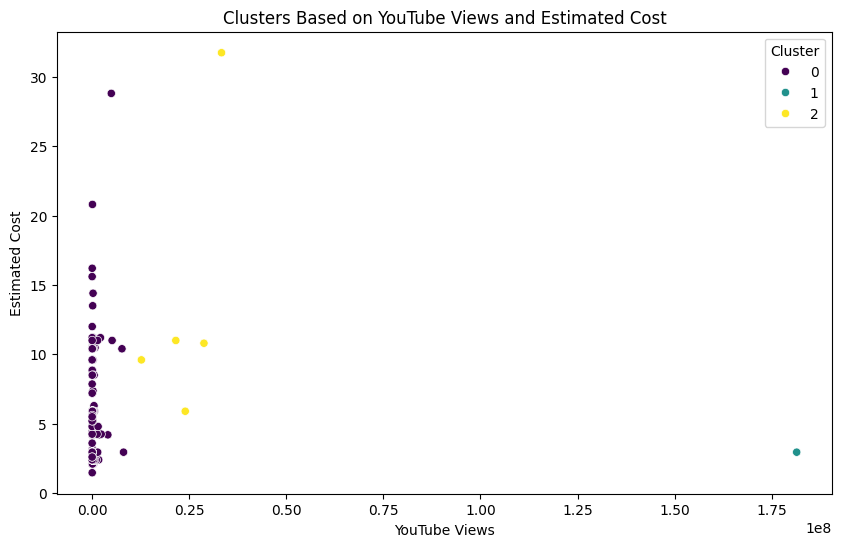

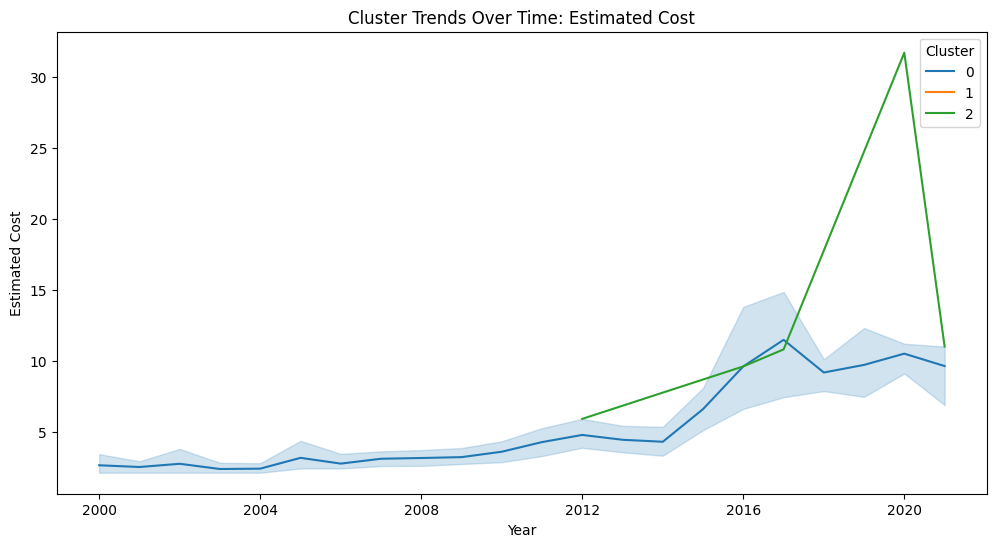

Updated dataset saved as 'superbowl_commercials_with_clusters.csv'.


In [26]:
# Step 1: Load the Dataset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('superbowl_commercials.csv')

# Ensure numeric columns are correctly handled
numeric_cols = ['Estimated Cost', 'Youtube Views', 'Youtube Likes', 'Length', 'TV Viewers']

# Step 2: Prepare Data for Clustering
# Handle missing values by filling with mean
data_cluster = data[numeric_cols].fillna(data[numeric_cols].mean())

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_cluster)

# Step 4: Add Cluster Labels
data['Cluster'] = clusters

# Step 5: Group Analysis
# Ensure grouping focuses on numeric columns only
cluster_analysis = data.groupby('Cluster')[numeric_cols].mean()
print("Cluster Analysis:\n", cluster_analysis)

# Count the number of samples in each cluster
cluster_counts = data['Cluster'].value_counts()
print("\nCluster Counts:\n", cluster_counts)

# Step 6: Visualize Clusters
# Scatter plot for two numeric variables colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Youtube Views', y='Estimated Cost', hue='Cluster', palette='viridis')
plt.title("Clusters Based on YouTube Views and Estimated Cost")
plt.xlabel("YouTube Views")
plt.ylabel("Estimated Cost")
plt.legend(title="Cluster")
plt.show()

# Step 7: Visualize Cluster Trends Over Time (if 'Year' exists)
if 'Year' in data.columns:
    # Ensure 'Year' is numeric or datetime
    data['Year'] = pd.to_datetime(data['Year'], errors='coerce', format='%Y')
    if data['Year'].isna().sum() == 0:  # Proceed if no parsing errors
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=data, x='Year', y='Estimated Cost', hue='Cluster', palette='tab10')
        plt.title("Cluster Trends Over Time: Estimated Cost")
        plt.xlabel("Year")
        plt.ylabel("Estimated Cost")
        plt.legend(title="Cluster")
        plt.show()

# Step 8: Save Updated Dataset
data.to_csv('superbowl_commercials_with_clusters.csv', index=False)
print("Updated dataset saved as 'superbowl_commercials_with_clusters.csv'.")


In [27]:
# Display basic statistics for numerical columns
data.describe()

# Display the column-wise missing values
data.isnull().sum()


Year                      0
Brand                     0
Superbowl Ads Link        0
Youtube Link              9
Funny                     0
Shows Product Quickly     0
Patriotic                 0
Celebrity                 0
Danger                    0
Animals                   0
Uses Sex                  0
Length                    0
Estimated Cost            0
Youtube Views            12
Youtube Likes            18
TV Viewers                0
Cluster                   0
dtype: int64

In [28]:
# Add a new column as an example of elaboration
data['Cost per Viewer'] = data['Estimated Cost'] / data['TV Viewers']
data.head()


Year      Brand                                 Superbowl Ads Link  \
0 2000-01-01    E-Trade  https://superbowl-ads.com/2000-etrade-monkey-d...   
1 2000-01-01    E-Trade  https://superbowl-ads.com/2000-etrade-money-ou...   
2 2000-01-01  Budweiser  https://superbowl-ads.com/2000-budweiser-whaas...   
3 2000-01-01  Bud Light  https://superbowl-ads.com/2000-bud-light-hold-...   
4 2000-01-01  Budweiser  https://superbowl-ads.com/2000-budweiser-talki...   

                                  Youtube Link  Funny  Shows Product Quickly  \
0  https://www.youtube.com/watch?v=Muyq2kMDFoA   True                   True   
1  https://www.youtube.com/watch?v=oftjwYmlfoA   True                   True   
2  https://www.youtube.com/watch?v=loimTUjV92Q   True                   True   
3  https://www.youtube.com/watch?v=M3IV93HwSkc   True                   True   
4  https://www.youtube.com/watch?v=dK1tlG778J8   True                  False   

   Patriotic  Celebrity  Danger  Animals  Uses Sex  Length  Estimated Cost  \
0      False      False   False     True     False      30             2.1   
1      False      False    True    False     False      30             2.1   
2      False      False   False    False     False      30             2.1   
3      False      False    True    False     False      30             2.1   
4      False      False   False     True     False      30             2.1   

   Youtube Views  Youtube Likes  TV Viewers  Cluster  Cost per Viewer  
0        13615.0           84.0       88.47        0         0.023737  
1        72772.0          146.0       88.47        0         0.023737  
2         5399.0           11.0       88.47        0         0.023737  
3         6699.0            8.0       88.47        0         0.023737  
4        18972.0            6.0       88.47        0         0.023737

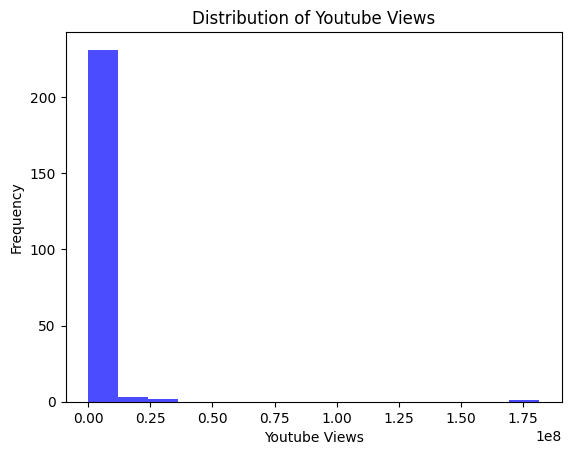

In [29]:
# Analyze a single variable
data['Youtube Views'].describe()

# Histogram of Youtube Views
plt.hist(data['Youtube Views'], bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Youtube Views')
plt.xlabel('Youtube Views')
plt.ylabel('Frequency')
plt.show()


Correlation between Youtube Views and Likes: 0.8155059146666926


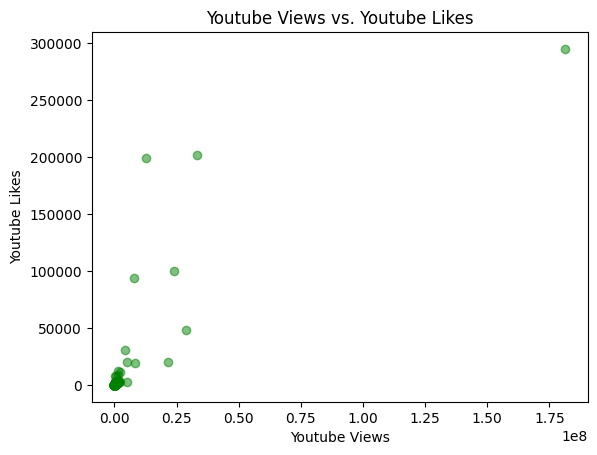

In [30]:
# Analyze relationships between two variables
correlation = data['Youtube Views'].corr(data['Youtube Likes'])
print(f"Correlation between Youtube Views and Likes: {correlation}")

# Scatter plot for two variables
plt.scatter(data['Youtube Views'], data['Youtube Likes'], alpha=0.5, c='green')
plt.title('Youtube Views vs. Youtube Likes')
plt.xlabel('Youtube Views')
plt.ylabel('Youtube Likes')
plt.show()


In [31]:
# Create a contingency table for two categorical variables
contingency_table = pd.crosstab(data['Funny'], data['Celebrity'])
print(contingency_table)


Celebrity  False  True 
Funny                  
False         54     23
True         124     48


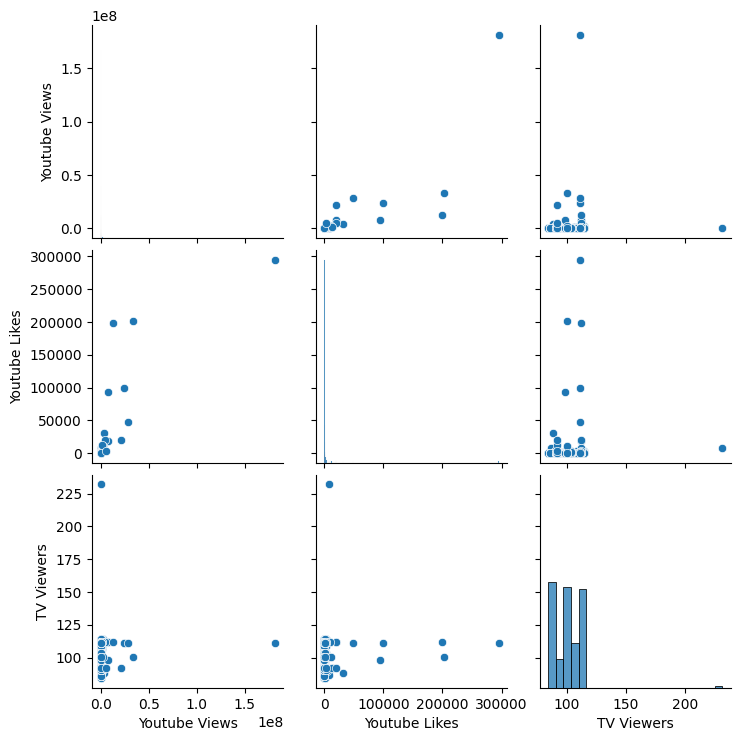

In [32]:
# Analyze multi-dimensional data using pair plots
sns.pairplot(data[['Youtube Views', 'Youtube Likes', 'TV Viewers']])
plt.show()


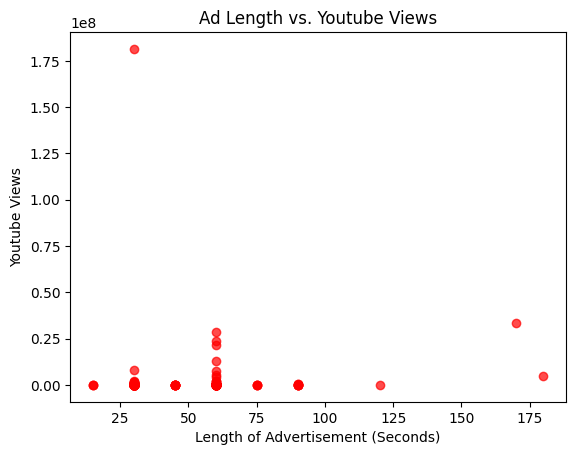

In [33]:
plt.scatter(data['Length'], data['Youtube Views'], alpha=0.7, c='red')
plt.title('Ad Length vs. Youtube Views')
plt.xlabel('Length of Advertisement (Seconds)')
plt.ylabel('Youtube Views')
plt.show()


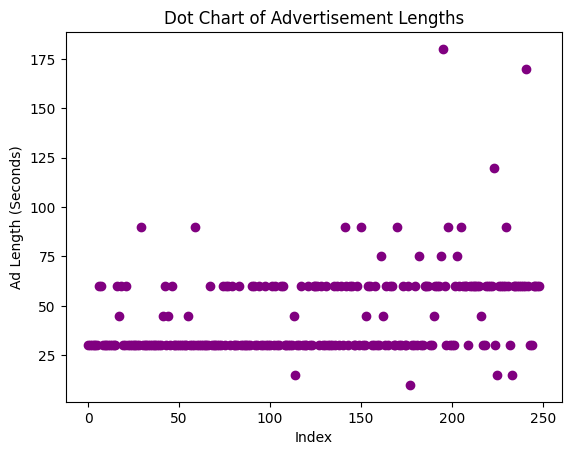

In [34]:
plt.plot(data['Length'], 'o', color='purple')
plt.title('Dot Chart of Advertisement Lengths')
plt.xlabel('Index')
plt.ylabel('Ad Length (Seconds)')
plt.show()


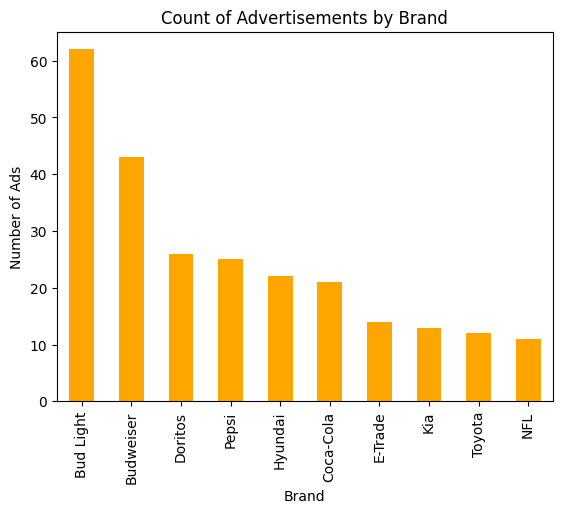

In [35]:
data['Brand'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Advertisements by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Ads')
plt.show()


In [36]:
# Install scikit-learn and scipy if not already installed
!pip install scikit-learn scipy


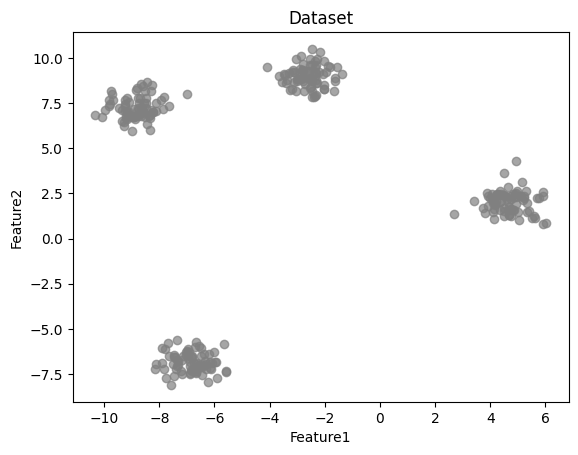

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial import distance_matrix

# Generate a synthetic dataset for demonstration
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Visualize the dataset
plt.scatter(df['Feature1'], df['Feature2'], c='gray', alpha=0.7)
plt.title('Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


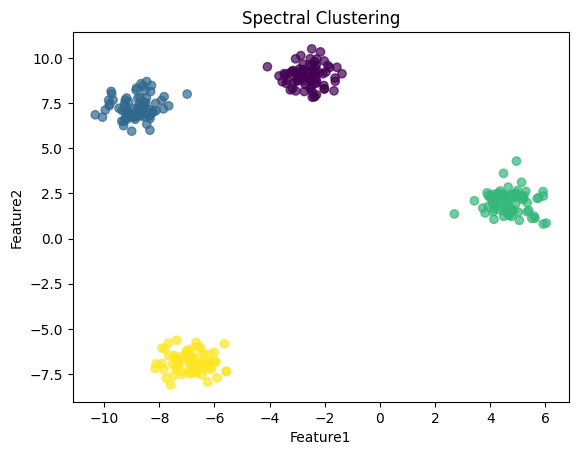

In [38]:
# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(df)

# Plot results
plt.scatter(df['Feature1'], df['Feature2'], c=labels_spectral, cmap='viridis', alpha=0.7)
plt.title('Spectral Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


In [39]:
# Example document dataset: Word frequencies matrix
documents = ['text mining is great', 'clustering text data', 'document similarity', 'clustering algorithms']
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# KMeans for document clustering
kmeans = KMeans(n_clusters=2, random_state=42)
doc_labels = kmeans.fit_predict(tfidf_matrix)

# Print document clusters
for i, label in enumerate(doc_labels):
    print(f"Document {i+1}: Cluster {label}")


Document 1: Cluster 0
Document 2: Cluster 0
Document 3: Cluster 0
Document 4: Cluster 1


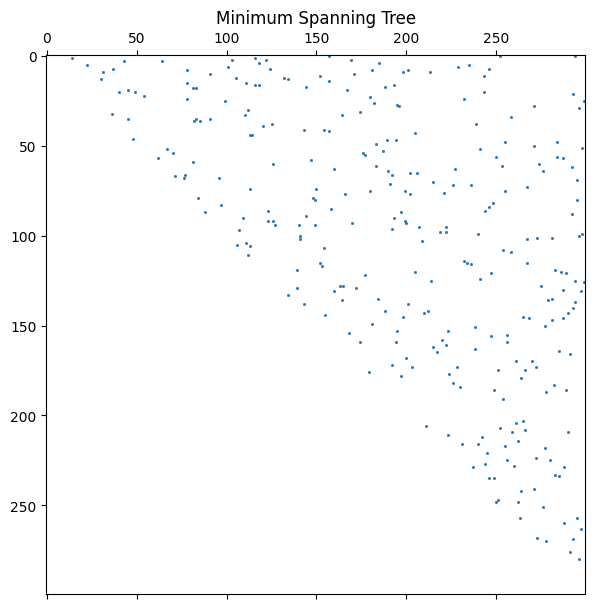

In [40]:
# Create distance matrix and MST
dist_matrix = distance_matrix(df, df)
mst = minimum_spanning_tree(dist_matrix)

# Visualize MST
plt.figure(figsize=(10, 7))
plt.spy(mst, markersize=1)
plt.title('Minimum Spanning Tree')
plt.show()


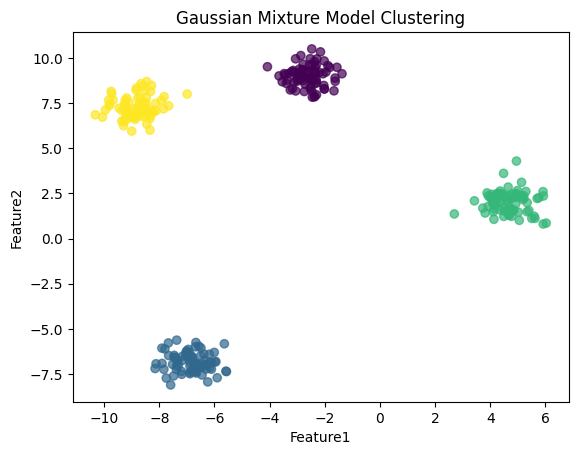

In [41]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df)

# Plot results
plt.scatter(df['Feature1'], df['Feature2'], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


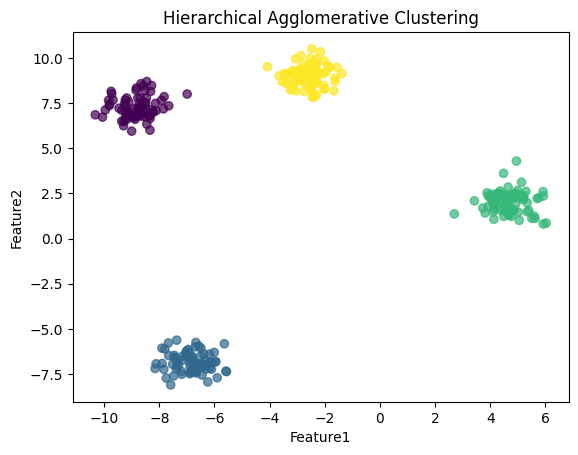

In [42]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(df)

# Plot results
plt.scatter(df['Feature1'], df['Feature2'], c=labels_agglo, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


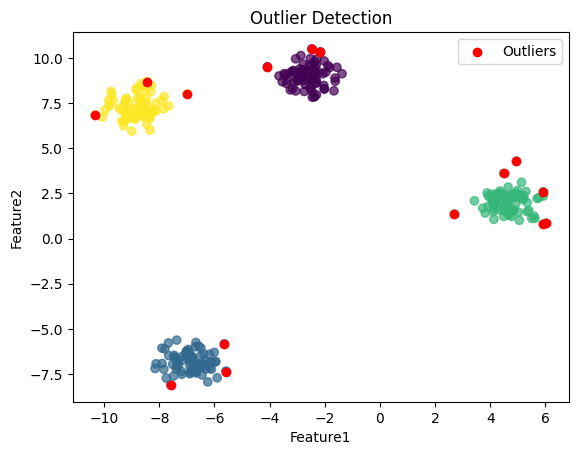

In [43]:
# Use KMeans for clustering and identify outliers
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Compute distances to centroids
distances = np.min(distance_matrix(df, centroids), axis=1)
threshold = np.percentile(distances, 95)  # Define a threshold for outliers
outliers = distances > threshold

# Plot results
plt.scatter(df['Feature1'], df['Feature2'], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.scatter(df[outliers]['Feature1'], df[outliers]['Feature2'], c='red', label='Outliers')
plt.legend()
plt.title('Outlier Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


In [44]:
!pip install numpy pandas matplotlib scikit-learn minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=4b74acfba54111fc4e9c1acd021f1011391d856e95ec0ef3f8c8e69f6d15e644
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


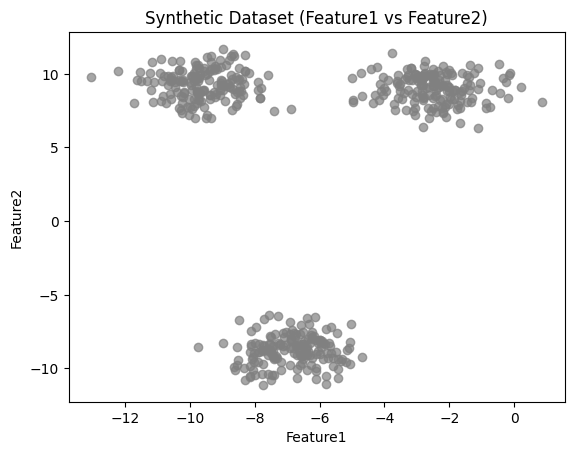

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_swiss_roll

# Generate synthetic data
data, _ = make_blobs(n_samples=500, centers=3, n_features=5, random_state=42)
df = pd.DataFrame(data, columns=[f'Feature{i+1}' for i in range(data.shape[1])])

# Visualize the first two features
plt.scatter(df['Feature1'], df['Feature2'], c='gray', alpha=0.7)
plt.title('Synthetic Dataset (Feature1 vs Feature2)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


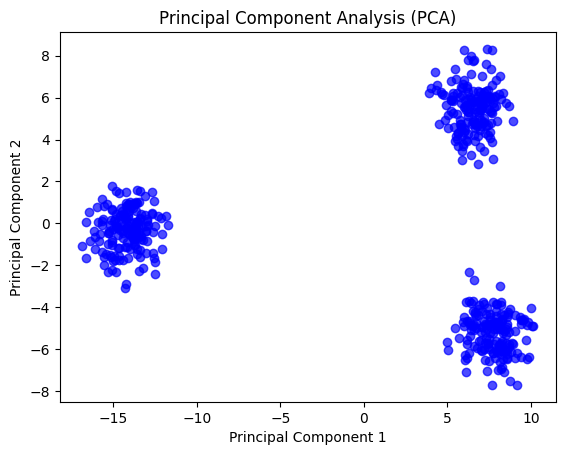

In [46]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.7)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


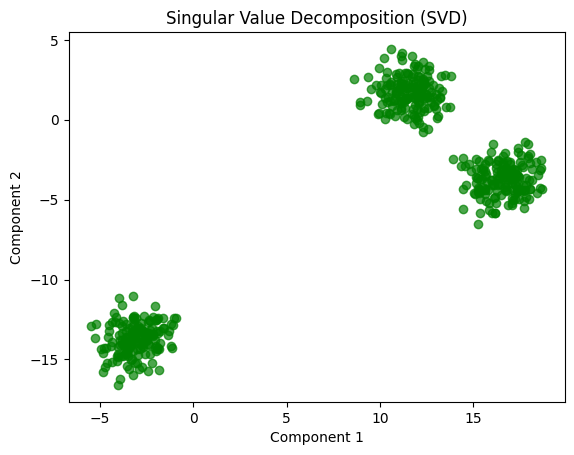

In [47]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(data)

# Visualize SVD results
plt.scatter(svd_result[:, 0], svd_result[:, 1], c='green', alpha=0.7)
plt.title('Singular Value Decomposition (SVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


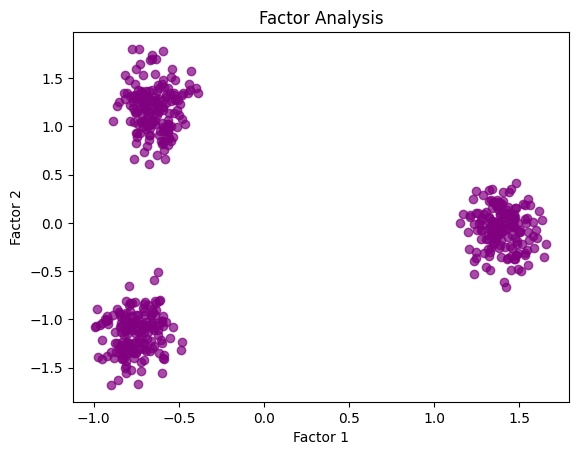

In [48]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_result = fa.fit_transform(data)

# Visualize Factor Analysis results
plt.scatter(fa_result[:, 0], fa_result[:, 1], c='purple', alpha=0.7)
plt.title('Factor Analysis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()


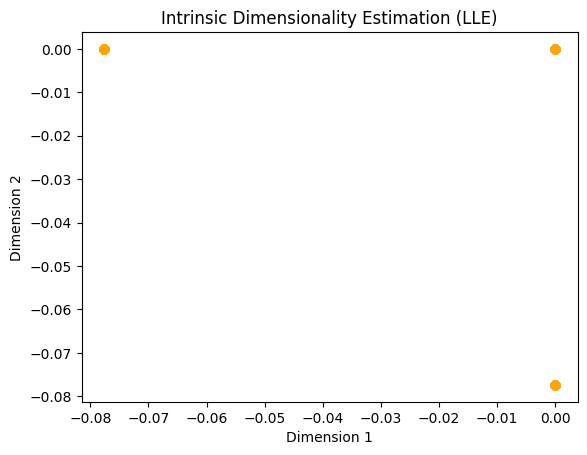

In [49]:
from sklearn.manifold import LocallyLinearEmbedding

# Use Locally Linear Embedding for intrinsic dimensionality
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
lle_result = lle.fit_transform(data)

# Visualize LLE results
plt.scatter(lle_result[:, 0], lle_result[:, 1], c='orange', alpha=0.7)
plt.title('Intrinsic Dimensionality Estimation (LLE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


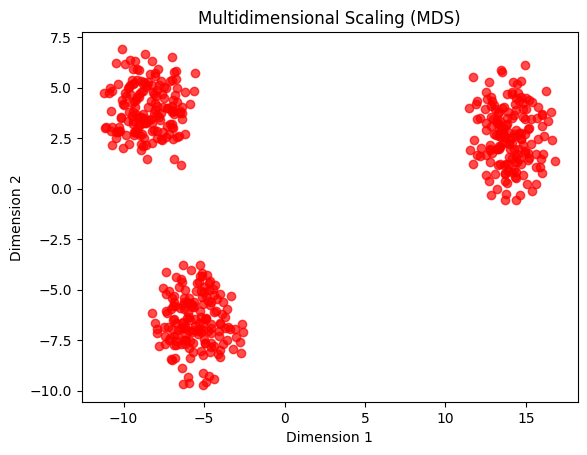

In [50]:
from sklearn.manifold import MDS

# Apply Multidimensional Scaling
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(data)

# Visualize MDS results
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='red', alpha=0.7)
plt.title('Multidimensional Scaling (MDS)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


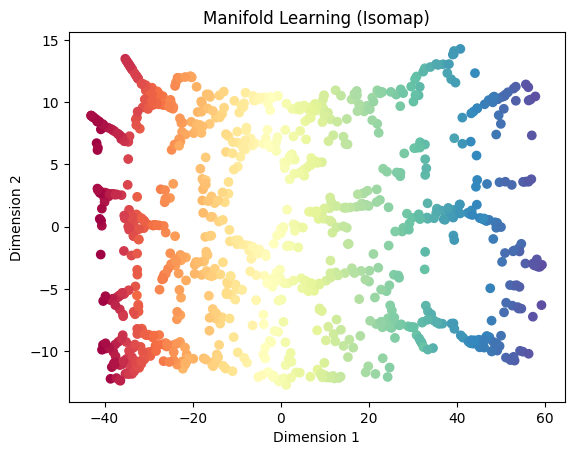

In [51]:
# Generate Swiss Roll Data
swiss_data, swiss_colors = make_swiss_roll(n_samples=1000, random_state=42)

from sklearn.manifold import Isomap

# Apply Isomap for Manifold Learning
isomap = Isomap(n_components=2)
manifold_result = isomap.fit_transform(swiss_data)

# Visualize Manifold Learning results
plt.scatter(manifold_result[:, 0], manifold_result[:, 1], c=swiss_colors, cmap='Spectral')
plt.title('Manifold Learning (Isomap)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


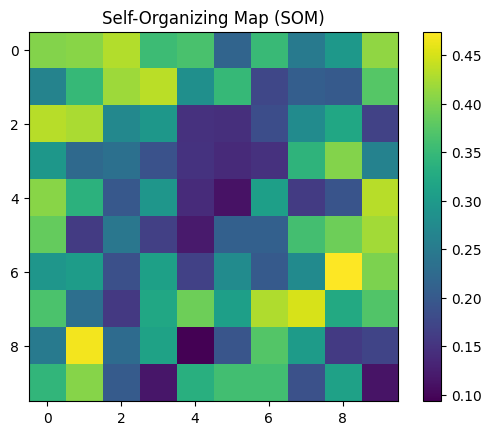

In [52]:
from minisom import MiniSom

# Normalize data
data_norm = (data - np.min(data)) / (np.max(data) - np.min(data))

# Apply Self-Organizing Map
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_norm)
som.train_random(data_norm, 100)

# Visualize SOM results
weights = som.get_weights()
plt.imshow(weights[:, :, 0], cmap='viridis')
plt.title('Self-Organizing Map (SOM)')
plt.colorbar()
plt.show()


In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 3.5 * X + np.random.randn(100, 1) * 2  # Dependent variable with some noise

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model coefficients
print(f"Model Coefficients: {model.coef_[0][0]}, Intercept: {model.intercept_[0]}")


Model Coefficients: 3.4197294629921102, Intercept: 0.2858266389171362


Mean Squared Error (MSE): 2.614798054868007
R-squared (R²): 0.9770848891142176


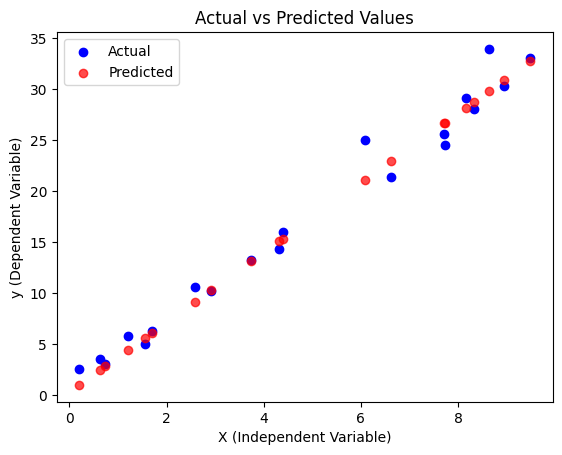

In [54]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()


Estimated rewards: [0.2173913  0.60465116 0.79842342]
Actual rewards: [0.2, 0.5, 0.8]
Counts: [ 69.  43. 888.]


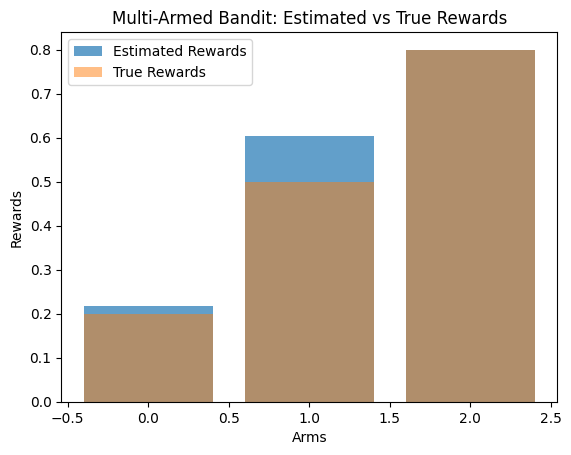

In [55]:
import numpy as np

# Simulate a multi-armed bandit problem with 3 arms
n_arms = 3
true_rewards = [0.2, 0.5, 0.8]  # Probability of reward for each arm
n_steps = 1000

# Initialize rewards and counts for each arm
estimated_rewards = np.zeros(n_arms)
counts = np.zeros(n_arms)

# Epsilon-greedy strategy
epsilon = 0.1

# Simulate the agent's interactions
for step in range(n_steps):
    if np.random.rand() < epsilon:  # Explore
        arm = np.random.choice(n_arms)
    else:  # Exploit
        arm = np.argmax(estimated_rewards)

    # Simulate pulling the arm
    reward = np.random.rand() < true_rewards[arm]

    # Update estimates
    counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]

# Results
print(f"Estimated rewards: {estimated_rewards}")
print(f"Actual rewards: {true_rewards}")
print(f"Counts: {counts}")

# Visualize results
plt.bar(range(n_arms), estimated_rewards, alpha=0.7, label='Estimated Rewards')
plt.bar(range(n_arms), true_rewards, alpha=0.5, label='True Rewards')
plt.legend()
plt.title('Multi-Armed Bandit: Estimated vs True Rewards')
plt.xlabel('Arms')
plt.ylabel('Rewards')
plt.show()
